In [1]:
import ipy_table
import re
%run ../aux/postgres.py

postgres functions loaded...


## categoria information

In [2]:
cmd = ("SELECT t.text "
       "FROM tweet t "
       "INNER JOIN resultadoanaliseprojetotweet r ON r.codtweet = t.codtweet "
       "WHERE codresultadoanaliseprojeto = 12 AND codclassificacao = 223"
       )
tweets = query(cmd)
print(len(tweets))

17227


In [3]:
print(tweets[:20])

[("Don't forget to register for the next Dental Implant Seminar. July 13 in East Aurora; July 14 in Amherst.... https://t.co/4N4qeo9ygw",), ('Register Now!\n\nDental Implant Training (2 modules) With patients 1st Module (2-3 days) 13-15 October 2016\n\nModule... https://t.co/TbHaJSrXIl',), ('Register Now!\n\nDental Implant Training (2 modules) With patients 1st Module (2-3 days) 13-15 October 2016\n\nModule... https://t.co/gkH0Q2Uc2V',), ('Dental Consumables Market :  Take Advantage of Growing Dental Implant Demand https://t.co/eWR4ajMigv #infowars #alexjones',), ('Free Senior Lecture Dental Treatment For A Lifetime Using Dental Implants: Wed, Jul 13 2016 11:30 AM… https://t.co/APBnaj5EIc #GlendaleCA',), ('Thinking about Dental Implants? Join us tonight for a FREE Seminar &amp; get all of your questions answered! https://t.co/Y0YDwSesuV',), ('[DENTAL PROFESSIONALS] CE: Jul 28 Online Marketing Strategies, Aug 11 Interdisciplinary Approach to Dental Implants  https://t.co/qrgPwxrrQn',), 

# Pré-processamento

In [4]:
import re
happyFace = ['😅', '😁', '😍', '❤', '😂', '😋', '😌', '☺', '😘']
sadFace = ['😪', '😭', '😩']
neutralFace = ['😐', '😒']
scaryFace = ['😱']

def proc_emoji(tweet):
    for em in happyFace:
        tweet = tweet.replace(em, ' happyFace ')

    for em in neutralFace:
        tweet = tweet.replace(em, ' neutralFace ')

    for em in sadFace:
        tweet = tweet.replace(em, ' sadFace ')

    for em in scaryFace:
        tweet = tweet.replace(em, ' scaryFace ')
    return tweet
    
    
def pre_proc(doc_complete):
    doc_complete = [ t[0].lower() for t in doc_complete ]
    
    # mention removal
    doc_complete = [re.sub("@\\w+", "", x) for x in doc_complete ]
    # Remove URL
    doc_complete = [re.sub("(f|ht)(tp)(s?)(://)(.*)[.|/](.*)", "", x) for x in doc_complete ]
    # Remove HTML symbols
    doc_complete = [re.sub("&[^\\s]*;", " ", x) for x in doc_complete ]
    # Remove numbers
    doc_complete = [re.sub("[0-9]+", "", x) for x in doc_complete ]
    # Interrogações
    doc_complete = [re.sub("[?]", "", x) for x in doc_complete ]
    # Remove Punctuation    
    doc_complete = [re.sub("[.,\\/#!?+$–\"|%-\\^&\\*;:{}=\\-_`~()]", " ", x) for x in doc_complete ]
    # Remove Emojis
    doc_complete = [proc_emoji(x) for x in doc_complete ]
    
    pattern = re.compile('[\W_]+')
    doc_complete = [pattern.sub(' ', x) for x in doc_complete ]
    return doc_complete

In [5]:
doc_complete =  pre_proc(tweets)
doc_complete[:20]
print(len(doc_complete))

17227


In [6]:
for d in doc_complete[:20]:
    print(d)

don t forget to register for the next dental implant seminar july in east aurora july in amherst 
register now dental implant training modules with patients st module days october module 
register now dental implant training modules with patients st module days october module 
dental consumables market take advantage of growing dental implant demand 
free senior lecture dental treatment for a lifetime using dental implants wed jul am 
thinking about dental implants join us tonight for a free seminar get all of your questions answered 
 dental professionals ce jul online marketing strategies aug interdisciplinary approach to dental implants 
rt dental professionals ce jul online marketing strategies aug interdisciplinary approach to dental implants https 
rt dental professionals ce jul online marketing strategies aug interdisciplinary approach to dental implants https 
rt dental professionals ce jul online marketing strategies aug interdisciplinary approach to dental implants https 
 fa

In [7]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
from collections import Counter

stop = set(stopwords.words('english')).union({'dental', 'implants', 'implant', 'rt'})
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
#doc_complete = [ t[0] for t in tweets ]
#print(stop)

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop and len(i) > 3])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    #normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    #normalized = [ w for w in punc_free if len(w) > 3 ]
    normalized = punc_free
    return normalized
''

doc_clean = [clean(doc).split() for doc in doc_complete] 
#print(doc_clean[:20])


print(len(doc_clean)*0.4)
ws = []
for f in doc_clean:
    for w in f:
        ws.append(w)
cws = Counter(ws)
rWords = [ x[0] for x in cws.most_common() ]
for x in cws.most_common(30):
    print(x)


6890.8
('market', 8407)
('global', 2640)
('research', 2025)
('growth', 2009)
('world', 1439)
('dentist', 1402)
('cosmetic', 1342)
('forecast', 1329)
('analysis', 1262)
('expected', 1097)
('industry', 1077)
('robot', 1057)
('report', 1057)
('free', 1052)
('first', 1043)
('interview', 962)
('demand', 936)
('reach', 931)
('trends', 902)
('training', 901)
('till', 887)
('witness', 859)
('share', 852)
('million', 827)
('prosthetics', 783)
('agravat', 730)
('revenue', 684)
('chinese', 668)
('automated', 660)
('size', 659)


In [8]:
for d in doc_clean[:20]:
    print(d)
print(len(doc_clean))

['forget', 'register', 'next', 'seminar', 'july', 'east', 'aurora', 'july', 'amherst']
['register', 'training', 'modules', 'patients', 'module', 'days', 'october', 'module']
['register', 'training', 'modules', 'patients', 'module', 'days', 'october', 'module']
['consumables', 'market', 'take', 'advantage', 'growing', 'demand']
['free', 'senior', 'lecture', 'treatment', 'lifetime', 'using']
['thinking', 'join', 'tonight', 'free', 'seminar', 'questions', 'answered']
['professionals', 'online', 'marketing', 'strategies', 'interdisciplinary', 'approach']
['professionals', 'online', 'marketing', 'strategies', 'interdisciplinary', 'approach', 'https']
['professionals', 'online', 'marketing', 'strategies', 'interdisciplinary', 'approach', 'https']
['professionals', 'online', 'marketing', 'strategies', 'interdisciplinary', 'approach', 'https']
['facts', 'novi', 'residents', 'lose', 'tooth', 'point', 'lives']
['open', 'evening', 'thur', 'july', 'come', 'informal', 'chat']
['open', 'evening', 't

# Topic Modeling

In [9]:
# Importing Gensim
import gensim
from gensim import corpora, models

# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

## Finding number of topics

In [10]:
import matplotlib.pyplot as plt   # for plotting the results
plt.style.use('ggplot')

# for loading the data:
from tmtoolkit.utils import unpickle_file
# for model evaluation with the lda package:
from tmtoolkit.lda_utils import tm_lda
# for constructing the evaluation plot:
from tmtoolkit.lda_utils.common import results_by_parameter
from tmtoolkit.lda_utils.visualize import plot_eval_results
import textmining

In [11]:
const_params = dict(n_iter=2000)
ks = list(range(10, 100, 10)) + list(range(100, 300, 20)) + list(range(300, 500, 50)) + [500, 600, 700]
varying_params = [dict(n_topics=k, alpha=1.0/k) for k in ks]

In [12]:
docs = {}
i=1
for doc in doc_clean:
    aux='doc'+str(i)
    docs[aux] = doc
    i+=1

In [13]:
import numpy as np
from scipy.sparse import coo_matrix
#from sets import Set

#docs = {
#    'doc1': ['python', 'text', 'data', 'nlp', 'data', 'matrix', 'mining'],
#    'doc2': ['data', 'science', 'data', 'processing', 'cleaning', 'data'],
#    'doc3': ['r', 'data', 'science', 'text', 'mining', 'nlp'],
#    'doc4': ['programming', 'c', 'algorithms', 'data', 'structures'],
#}

vocab = set()
n_nonzero = 0
for docterms in docs.values():
    unique_terms = set(docterms)    # all unique terms of this doc
    vocab |= unique_terms           # set union: add unique terms of this doc
    n_nonzero += len(unique_terms)  # add count of unique terms in this doc

# make a list of document names
# the order will be the same as in the dict
docnames = list(docs.keys())

#print(docnames)


docnames = np.array(docnames)
vocab = np.array(list(vocab))  

vocab_sorter = np.argsort(vocab)    # indices that sort "vocab"

ndocs = len(docnames)
nvocab = len(vocab)

data = np.empty(n_nonzero, dtype=np.intc)     # all non-zero term frequencies at data[k]
rows = np.empty(n_nonzero, dtype=np.intc)     # row index for kth data item (kth term freq.)
cols = np.empty(n_nonzero, dtype=np.intc)     # column index for kth data item (kth term freq.



In [14]:
ind = 0     # current index in the sparse matrix data
# go through all documents with their terms
for docname, terms in docs.items():
    # find indices into  such that, if the corresponding elements in  were
    # inserted before the indices, the order of  would be preserved
    # -> array of indices of  in 
    term_indices = vocab_sorter[np.searchsorted(vocab, terms, sorter=vocab_sorter)]

    # count the unique terms of the document and get their vocabulary indices
    uniq_indices, counts = np.unique(term_indices, return_counts=True)
    n_vals = len(uniq_indices)  # = number of unique terms
    ind_end = ind + n_vals  #  to  is the slice that we will fill with data

    data[ind:ind_end] = counts                  # save the counts (term frequencies)
    cols[ind:ind_end] = uniq_indices            # save the column index: index in 
    doc_idx = np.where(docnames == docname)     # get the document index for the document name
    rows[ind:ind_end] = np.repeat(doc_idx, n_vals)  # save it as repeated value

    ind = ind_end  # resume with next document -> add data to the end

In [15]:
dtm = coo_matrix((data, (rows, cols)), shape=(ndocs, nvocab), dtype=np.intc)

In [16]:
dtm

<17227x5760 sparse matrix of type '<class 'numpy.int32'>'
	with 116135 stored elements in COOrdinate format>

### alpha: 1/k beta: 0.01

In [17]:
const_params = dict(n_iter=2000, eta=0.01)
ks = list(range(10, 100, 10)) + list(range(100, 210, 20))
varying_params = [dict(n_topics=k, alpha=1.0/k) for k in ks]

ks

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200]

In [18]:
eval_results = tm_lda.evaluate_topic_models(dtm,
    varying_params,
    const_params)

INFO:lda:n_documents: 17227
INFO:lda:n_documents: 17227
INFO:lda:n_documents: 17227
INFO:lda:vocab_size: 5760
INFO:lda:n_documents: 17227
INFO:lda:n_words: 118219
INFO:lda:vocab_size: 5760
INFO:lda:vocab_size: 5760
INFO:lda:vocab_size: 5760
INFO:lda:n_topics: 20
INFO:lda:n_documents: 17227
INFO:lda:n_words: 118219
INFO:lda:n_iter: 2000
INFO:lda:n_words: 118219
INFO:lda:vocab_size: 5760
INFO:lda:n_topics: 30
INFO:lda:n_documents: 17227
INFO:lda:n_words: 118219
INFO:lda:n_words: 118219
INFO:lda:n_iter: 2000
INFO:lda:n_topics: 10
INFO:lda:n_documents: 17227
INFO:lda:n_topics: 40
INFO:lda:n_documents: 17227
INFO:lda:n_topics: 50
INFO:lda:vocab_size: 5760
INFO:lda:vocab_size: 5760
INFO:lda:vocab_size: 5760
INFO:lda:n_documents: 17227
INFO:lda:n_iter: 2000
INFO:lda:n_documents: 17227
INFO:lda:n_iter: 2000
INFO:lda:n_iter: 2000
INFO:lda:n_words: 118219
INFO:lda:n_words: 118219
INFO:lda:n_words: 118219
INFO:lda:vocab_size: 5760
INFO:lda:n_topics: 70
INFO:lda:n_topics: 60
INFO:lda:vocab_size: 5

INFO:lda:<10> log likelihood: -723420
INFO:lda:<70> log likelihood: -638530
INFO:lda:<20> log likelihood: -666080
INFO:lda:<120> log likelihood: -663034
INFO:lda:<60> log likelihood: -624451
INFO:lda:<10> log likelihood: -720885
INFO:lda:<80> log likelihood: -637907
INFO:lda:<130> log likelihood: -662868
INFO:lda:<30> log likelihood: -637647
INFO:lda:<10> log likelihood: -723868
INFO:lda:<50> log likelihood: -624494
INFO:lda:<140> log likelihood: -662808
INFO:lda:<90> log likelihood: -637247
INFO:lda:<20> log likelihood: -664442
INFO:lda:<10> log likelihood: -725596
INFO:lda:<40> log likelihood: -626866
INFO:lda:<30> log likelihood: -635705
INFO:lda:<70> log likelihood: -623607
INFO:lda:<150> log likelihood: -662805
INFO:lda:<100> log likelihood: -636320
INFO:lda:<30> log likelihood: -634044
INFO:lda:<160> log likelihood: -662322
INFO:lda:<60> log likelihood: -619410
INFO:lda:<170> log likelihood: -662240
INFO:lda:<80> log likelihood: -621712
INFO:lda:<20> log likelihood: -664587
INFO:

INFO:lda:<130> log likelihood: -588375
INFO:lda:<220> log likelihood: -604578
INFO:lda:<400> log likelihood: -631264
INFO:lda:<650> log likelihood: -660991
INFO:lda:<180> log likelihood: -596962
INFO:lda:<90> log likelihood: -596732
INFO:lda:<410> log likelihood: -630841
INFO:lda:<660> log likelihood: -661030
INFO:lda:<290> log likelihood: -614385
INFO:lda:<160> log likelihood: -591457
INFO:lda:<670> log likelihood: -660875
INFO:lda:<230> log likelihood: -604382
INFO:lda:<420> log likelihood: -631517
INFO:lda:<680> log likelihood: -660943
INFO:lda:<50> log likelihood: -622428
INFO:lda:<300> log likelihood: -614510
INFO:lda:<120> log likelihood: -590674
INFO:lda:<190> log likelihood: -596779
INFO:lda:<690> log likelihood: -660707
INFO:lda:<110> log likelihood: -590207
INFO:lda:<430> log likelihood: -631162
INFO:lda:<140> log likelihood: -587287
INFO:lda:<700> log likelihood: -661023
INFO:lda:<240> log likelihood: -604863
INFO:lda:<310> log likelihood: -614602
INFO:lda:<710> log likeliho

INFO:lda:<520> log likelihood: -614276
INFO:lda:<330> log likelihood: -595364
INFO:lda:<160> log likelihood: -586257
INFO:lda:<1180> log likelihood: -660801
INFO:lda:<730> log likelihood: -630801
INFO:lda:<400> log likelihood: -602910
INFO:lda:<1190> log likelihood: -660871
INFO:lda:<280> log likelihood: -588696
INFO:lda:<240> log likelihood: -582442
INFO:lda:<530> log likelihood: -613678
INFO:lda:<1200> log likelihood: -660576
INFO:lda:<740> log likelihood: -630611
INFO:lda:<210> log likelihood: -584512
INFO:lda:<1210> log likelihood: -660712
INFO:lda:<190> log likelihood: -583756
INFO:lda:<340> log likelihood: -595102
INFO:lda:<410> log likelihood: -602750
INFO:lda:<1220> log likelihood: -660814
INFO:lda:<750> log likelihood: -630797
INFO:lda:<540> log likelihood: -613817
INFO:lda:<1230> log likelihood: -660334
INFO:lda:<290> log likelihood: -588560
INFO:lda:<760> log likelihood: -630344
INFO:lda:<1240> log likelihood: -660708
INFO:lda:<140> log likelihood: -586601
INFO:lda:<550> log

INFO:lda:<340> log likelihood: -580223
INFO:lda:<750> log likelihood: -613386
INFO:lda:<400> log likelihood: -586927
INFO:lda:<1690> log likelihood: -660924
INFO:lda:<1060> log likelihood: -630587
INFO:lda:<580> log likelihood: -602015
INFO:lda:<1700> log likelihood: -660672
INFO:lda:<300> log likelihood: -583919
INFO:lda:<480> log likelihood: -594467
INFO:lda:<760> log likelihood: -613343
INFO:lda:<1710> log likelihood: -660539
INFO:lda:<1070> log likelihood: -630821
INFO:lda:<110> log likelihood: -599626
INFO:lda:<1720> log likelihood: -660631
INFO:lda:<270> log likelihood: -579551
INFO:lda:<1080> log likelihood: -630907
INFO:lda:<1730> log likelihood: -660459
INFO:lda:<590> log likelihood: -602131
INFO:lda:<350> log likelihood: -580048
INFO:lda:<770> log likelihood: -613673
INFO:lda:<410> log likelihood: -587001
INFO:lda:<1740> log likelihood: -660617
INFO:lda:<1090> log likelihood: -630740
INFO:lda:<140> log likelihood: -587901
INFO:lda:<490> log likelihood: -594269
INFO:lda:<240> 

INFO:lda:<350> log likelihood: -577409
INFO:lda:<770> log likelihood: -601117
INFO:lda:<1410> log likelihood: -630211
INFO:lda:<1010> log likelihood: -613394
INFO:lda:<310> log likelihood: -578978
INFO:lda:<640> log likelihood: -594086
INFO:lda:<540> log likelihood: -585965
INFO:lda:<1420> log likelihood: -630564
INFO:lda:<260> log likelihood: -575488
INFO:lda:<400> log likelihood: -581249
INFO:lda:<460> log likelihood: -579432
INFO:lda:<1020> log likelihood: -613688
INFO:lda:<780> log likelihood: -601937
INFO:lda:<1430> log likelihood: -630837
INFO:lda:<220> log likelihood: -577253
INFO:lda:<1030> log likelihood: -613573
INFO:lda:<1440> log likelihood: -630345
INFO:lda:<650> log likelihood: -593955
INFO:lda:<790> log likelihood: -601621
INFO:lda:<360> log likelihood: -577230
INFO:lda:<550> log likelihood: -586226
INFO:lda:<1450> log likelihood: -630538
INFO:lda:<1040> log likelihood: -613306
INFO:lda:<470> log likelihood: -580097
INFO:lda:<410> log likelihood: -581211
INFO:lda:<1460> 

INFO:lda:<1850> log likelihood: -630770
INFO:lda:<590> log likelihood: -578969
INFO:lda:<1320> log likelihood: -612587
INFO:lda:<460> log likelihood: -574652
INFO:lda:<1860> log likelihood: -630526
INFO:lda:<1010> log likelihood: -601053
INFO:lda:<240> log likelihood: -577856
INFO:lda:<830> log likelihood: -593528
INFO:lda:<700> log likelihood: -586165
INFO:lda:<1870> log likelihood: -630500
INFO:lda:<1330> log likelihood: -613266
INFO:lda:<190> log likelihood: -589833
INFO:lda:<520> log likelihood: -580593
INFO:lda:<1880> log likelihood: -630339
INFO:lda:<340> log likelihood: -572569
INFO:lda:<1020> log likelihood: -601395
INFO:lda:<600> log likelihood: -579286
INFO:lda:<1340> log likelihood: -613160
INFO:lda:<410> log likelihood: -575908
INFO:lda:<1890> log likelihood: -630366
INFO:lda:<840> log likelihood: -592952
INFO:lda:<470> log likelihood: -574565
INFO:lda:<710> log likelihood: -585685
INFO:lda:<1350> log likelihood: -613037
INFO:lda:<1030> log likelihood: -601636
INFO:lda:<190

INFO:lda:<510> log likelihood: -574346
INFO:lda:<580> log likelihood: -573779
INFO:lda:<1280> log likelihood: -600754
INFO:lda:<1040> log likelihood: -593116
INFO:lda:<880> log likelihood: -584844
INFO:lda:<750> log likelihood: -578655
INFO:lda:<1680> log likelihood: -612718
INFO:lda:<1290> log likelihood: -601146
INFO:lda:<240> log likelihood: -585380
INFO:lda:<1690> log likelihood: -612929
INFO:lda:<1050> log likelihood: -593150
INFO:lda:<660> log likelihood: -579377
INFO:lda:<890> log likelihood: -585603
INFO:lda:<270> log likelihood: -582665
INFO:lda:<430> log likelihood: -572054
INFO:lda:<360> log likelihood: -573174
INFO:lda:<1300> log likelihood: -601135
INFO:lda:<1700> log likelihood: -612682
INFO:lda:<590> log likelihood: -574231
INFO:lda:<760> log likelihood: -578530
INFO:lda:<520> log likelihood: -573695
INFO:lda:<1060> log likelihood: -593412
INFO:lda:<1710> log likelihood: -612715
INFO:lda:<1310> log likelihood: -600896
INFO:lda:<900> log likelihood: -585333
INFO:lda:<670>

INFO:lda:<920> log likelihood: -578361
INFO:lda:<1580> log likelihood: -601055
INFO:lda:<630> log likelihood: -573909
INFO:lda:<1080> log likelihood: -585042
INFO:lda:<1280> log likelihood: -593213
INFO:lda:<1590> log likelihood: -601003
INFO:lda:<930> log likelihood: -578640
INFO:lda:<720> log likelihood: -573662
INFO:lda:<440> log likelihood: -570686
INFO:lda:<330> log likelihood: -580941
INFO:lda:<1290> log likelihood: -592854
INFO:lda:<810> log likelihood: -579176
INFO:lda:<1090> log likelihood: -584775
INFO:lda:<1600> log likelihood: -600557
INFO:lda:<530> log likelihood: -569436
INFO:lda:<640> log likelihood: -573301
INFO:lda:<1300> log likelihood: -593213
INFO:lda:<1610> log likelihood: -600900
INFO:lda:<1100> log likelihood: -585419
INFO:lda:<940> log likelihood: -578195
INFO:lda:<380> log likelihood: -573236
INFO:lda:<730> log likelihood: -573701
INFO:lda:<820> log likelihood: -579232
INFO:lda:<1310> log likelihood: -592687
INFO:lda:<1620> log likelihood: -600506
INFO:lda:<300

INFO:lda:<880> log likelihood: -572269
INFO:lda:<1330> log likelihood: -585577
INFO:lda:<460> log likelihood: -572528
INFO:lda:<1950> log likelihood: -600661
INFO:lda:<1580> log likelihood: -593287
INFO:lda:<360> log likelihood: -579228
INFO:lda:<780> log likelihood: -572948
INFO:lda:<1140> log likelihood: -578337
INFO:lda:<1960> log likelihood: -600535
INFO:lda:<990> log likelihood: -578967
INFO:lda:<1340> log likelihood: -585302
INFO:lda:<1590> log likelihood: -593075
INFO:lda:<650> log likelihood: -569256
INFO:lda:<890> log likelihood: -573089
INFO:lda:<1970> log likelihood: -601052
INFO:lda:<1150> log likelihood: -578450
INFO:lda:<1350> log likelihood: -584837
INFO:lda:<410> log likelihood: -578805
INFO:lda:<1600> log likelihood: -592681
INFO:lda:<1000> log likelihood: -578327
INFO:lda:<1980> log likelihood: -600564
INFO:lda:<550> log likelihood: -568768
INFO:lda:<790> log likelihood: -572722
INFO:lda:<1990> log likelihood: -600725
INFO:lda:<1360> log likelihood: -584918
INFO:lda:<

INFO:lda:<1380> log likelihood: -577517
INFO:lda:<1920> log likelihood: -592967
INFO:lda:<1620> log likelihood: -584585
INFO:lda:<1070> log likelihood: -571404
INFO:lda:<1200> log likelihood: -578107
INFO:lda:<560> log likelihood: -571308
INFO:lda:<660> log likelihood: -567558
INFO:lda:<1390> log likelihood: -578195
INFO:lda:<1930> log likelihood: -592551
INFO:lda:<1630> log likelihood: -584804
INFO:lda:<950> log likelihood: -572272
INFO:lda:<790> log likelihood: -568952
INFO:lda:<440> log likelihood: -576321
INFO:lda:<1210> log likelihood: -578184
INFO:lda:<1080> log likelihood: -572431
INFO:lda:<1940> log likelihood: -593123
INFO:lda:<1400> log likelihood: -577378
INFO:lda:<1640> log likelihood: -584885
INFO:lda:<1950> log likelihood: -592837
INFO:lda:<960> log likelihood: -572245
INFO:lda:<500> log likelihood: -575974
INFO:lda:<1220> log likelihood: -577714
INFO:lda:<1650> log likelihood: -584359
INFO:lda:<1410> log likelihood: -578331
INFO:lda:<670> log likelihood: -567110
INFO:lda

INFO:lda:<1450> log likelihood: -578268
INFO:lda:<1960> log likelihood: -584911
INFO:lda:<1290> log likelihood: -571463
INFO:lda:<950> log likelihood: -568123
INFO:lda:<1150> log likelihood: -571896
INFO:lda:<1680> log likelihood: -578000
INFO:lda:<530> log likelihood: -574486
INFO:lda:<680> log likelihood: -570348
INFO:lda:<1460> log likelihood: -578109
INFO:lda:<1970> log likelihood: -584847
INFO:lda:<1300> log likelihood: -571830
INFO:lda:<800> log likelihood: -566567
INFO:lda:<1690> log likelihood: -577306
INFO:lda:<1980> log likelihood: -584419
INFO:lda:<600> log likelihood: -573906
INFO:lda:<1160> log likelihood: -571704
INFO:lda:<1470> log likelihood: -578638
INFO:lda:<960> log likelihood: -568177
INFO:lda:<1990> log likelihood: -584904
INFO:lda:<1310> log likelihood: -571550
INFO:lda:<1700> log likelihood: -577600
INFO:lda:<1480> log likelihood: -578171
INFO:lda:<690> log likelihood: -570298
INFO:lda:<1170> log likelihood: -571693
INFO:lda:<1999> log likelihood: -584522
INFO:tm

INFO:lda:<820> log likelihood: -569326
INFO:lda:<1760> log likelihood: -577398
INFO:lda:<960> log likelihood: -566596
INFO:lda:<1570> log likelihood: -571251
INFO:lda:<720> log likelihood: -572182
INFO:lda:<640> log likelihood: -573219
INFO:lda:<1400> log likelihood: -571064
INFO:lda:<1770> log likelihood: -577306
INFO:lda:<1160> log likelihood: -567985
INFO:lda:<1580> log likelihood: -571781
INFO:lda:<1780> log likelihood: -578060
INFO:lda:<1410> log likelihood: -571757
INFO:lda:<830> log likelihood: -569758
INFO:lda:<970> log likelihood: -566765
INFO:lda:<1590> log likelihood: -571441
INFO:lda:<1170> log likelihood: -567612
INFO:lda:<1790> log likelihood: -577460
INFO:lda:<730> log likelihood: -572351
INFO:lda:<1420> log likelihood: -571739
INFO:lda:<650> log likelihood: -573798
INFO:lda:<1600> log likelihood: -571179
INFO:lda:<1800> log likelihood: -577143
INFO:lda:<980> log likelihood: -566055
INFO:lda:<840> log likelihood: -569383
INFO:lda:<1180> log likelihood: -567886
INFO:lda:<

INFO:lda:<1730> log likelihood: -571276
INFO:lda:<1190> log likelihood: -566164
INFO:lda:<1020> log likelihood: -567974
INFO:lda:<1950> log likelihood: -571729
INFO:lda:<1440> log likelihood: -567731
INFO:lda:<1740> log likelihood: -571218
INFO:lda:<900> log likelihood: -571194
INFO:lda:<1960> log likelihood: -571377
INFO:lda:<1200> log likelihood: -566156
INFO:lda:<1030> log likelihood: -567745
INFO:lda:<800> log likelihood: -572092
INFO:lda:<1750> log likelihood: -571716
INFO:lda:<1450> log likelihood: -567335
INFO:lda:<1970> log likelihood: -571892
INFO:lda:<910> log likelihood: -570808
INFO:lda:<1760> log likelihood: -570911
INFO:lda:<1210> log likelihood: -565844
INFO:lda:<1460> log likelihood: -567700
INFO:lda:<1980> log likelihood: -571273
INFO:lda:<1040> log likelihood: -567983
INFO:lda:<1770> log likelihood: -571042
INFO:lda:<810> log likelihood: -571719
INFO:lda:<1990> log likelihood: -571706
INFO:lda:<1220> log likelihood: -565673
INFO:lda:<1470> log likelihood: -567669
INFO

INFO:lda:<1330> log likelihood: -566793
INFO:lda:<1550> log likelihood: -565088
INFO:lda:<1170> log likelihood: -568979
INFO:lda:<1870> log likelihood: -567508
INFO:lda:<1340> log likelihood: -567155
INFO:lda:<1040> log likelihood: -570523
INFO:lda:<1880> log likelihood: -567150
INFO:lda:<1560> log likelihood: -565139
INFO:lda:<1180> log likelihood: -569157
INFO:lda:<1890> log likelihood: -567964
INFO:lda:<1350> log likelihood: -566479
INFO:lda:<1570> log likelihood: -565352
INFO:lda:<1050> log likelihood: -570240
INFO:lda:<1900> log likelihood: -567520
INFO:lda:<1190> log likelihood: -568942
INFO:lda:<1580> log likelihood: -565515
INFO:lda:<1360> log likelihood: -566917
INFO:lda:<1910> log likelihood: -567728
INFO:lda:<1060> log likelihood: -570654
INFO:lda:<1200> log likelihood: -569213
INFO:lda:<1590> log likelihood: -565411
INFO:lda:<1920> log likelihood: -566822
INFO:lda:<1370> log likelihood: -566604
INFO:lda:<1930> log likelihood: -567465
INFO:lda:<1600> log likelihood: -564560


INFO:lda:<1840> log likelihood: -566311
INFO:lda:<1420> log likelihood: -568515
INFO:lda:<1620> log likelihood: -567526
INFO:lda:<1850> log likelihood: -566412
INFO:lda:<1430> log likelihood: -568754
INFO:lda:<1860> log likelihood: -566110
INFO:lda:<1630> log likelihood: -567903
INFO:lda:<1440> log likelihood: -568343
INFO:lda:<1870> log likelihood: -565939
INFO:lda:<1640> log likelihood: -568069
INFO:lda:<1880> log likelihood: -566126
INFO:lda:<1450> log likelihood: -569073
INFO:lda:<1650> log likelihood: -567073
INFO:lda:<1890> log likelihood: -565990
INFO:lda:<1460> log likelihood: -568668
INFO:lda:<1660> log likelihood: -566896
INFO:lda:<1900> log likelihood: -565791
INFO:lda:<1470> log likelihood: -569006
INFO:lda:<1670> log likelihood: -567043
INFO:lda:<1910> log likelihood: -566197
INFO:lda:<1680> log likelihood: -567618
INFO:lda:<1480> log likelihood: -568755
INFO:lda:<1920> log likelihood: -565795
INFO:lda:<1690> log likelihood: -567012
INFO:lda:<1930> log likelihood: -565928


plotting evaluation results


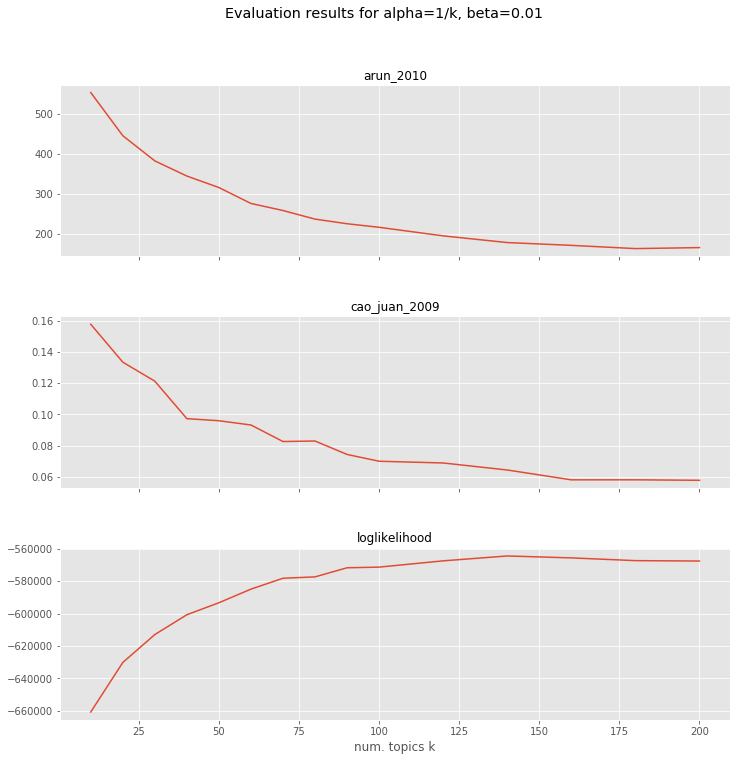

In [19]:
print('plotting evaluation results')
results_by_n_topics = results_by_parameter(eval_results, 'n_topics')
plot_eval_results(results_by_n_topics, xaxislabel='num. topics k',
                  title='Evaluation results for alpha=1/k, beta=0.01', figsize=(12, 12))
#plt.savefig('data/lda_evaluation_plot.png')
plt.show()



### alpha: 1/k beta: 0,1

In [20]:
const_params = dict(n_iter=2000, eta=0.1)
ks = list(range(10, 100, 10)) + list(range(100, 210, 20)) 
varying_params = [dict(n_topics=k, alpha=1.0/k) for k in ks]

eval_results2 = tm_lda.evaluate_topic_models(dtm,
    varying_params,
    const_params)

INFO:lda:n_documents: 17227
INFO:lda:vocab_size: 5760
INFO:lda:n_documents: 17227
INFO:lda:vocab_size: 5760
INFO:lda:n_documents: 17227
INFO:lda:n_words: 118219
INFO:lda:n_words: 118219
INFO:lda:n_topics: 10
INFO:lda:vocab_size: 5760
INFO:lda:n_documents: 17227
INFO:lda:n_documents: 17227
INFO:lda:vocab_size: 5760
INFO:lda:n_documents: 17227
INFO:lda:n_documents: 17227
INFO:lda:n_documents: 17227
INFO:lda:n_words: 118219
INFO:lda:n_documents: 17227
INFO:lda:vocab_size: 5760
INFO:lda:vocab_size: 5760
INFO:lda:n_words: 118219
INFO:lda:n_iter: 2000
INFO:lda:n_words: 118219
INFO:lda:vocab_size: 5760
INFO:lda:n_topics: 60
INFO:lda:n_words: 118219
INFO:lda:n_documents: 17227
INFO:lda:vocab_size: 5760
INFO:lda:n_iter: 2000
INFO:lda:n_words: 118219
INFO:lda:n_topics: 30
INFO:lda:n_words: 118219
INFO:lda:n_topics: 20
INFO:lda:n_topics: 40
INFO:lda:n_topics: 90
INFO:lda:n_iter: 2000
INFO:lda:n_documents: 17227
INFO:lda:vocab_size: 5760
INFO:lda:vocab_size: 5760
INFO:lda:n_iter: 2000
INFO:lda:n_t

INFO:lda:<40> log likelihood: -654560
INFO:lda:<30> log likelihood: -681551
INFO:lda:<40> log likelihood: -647051
INFO:lda:<20> log likelihood: -732222
INFO:lda:<30> log likelihood: -681403
INFO:lda:<130> log likelihood: -667454
INFO:lda:<80> log likelihood: -652943
INFO:lda:<10> log likelihood: -843497
INFO:lda:<140> log likelihood: -667562
INFO:lda:<50> log likelihood: -643262
INFO:lda:<90> log likelihood: -652538
INFO:lda:<150> log likelihood: -667525
INFO:lda:<50> log likelihood: -648463
INFO:lda:<30> log likelihood: -690862
INFO:lda:<40> log likelihood: -665429
INFO:lda:<20> log likelihood: -734572
INFO:lda:<160> log likelihood: -667100
INFO:lda:<10> log likelihood: -852698
INFO:lda:<100> log likelihood: -651899
INFO:lda:<60> log likelihood: -642134
INFO:lda:<30> log likelihood: -691538
INFO:lda:<170> log likelihood: -667010
INFO:lda:<40> log likelihood: -665549
INFO:lda:<20> log likelihood: -748572
INFO:lda:<60> log likelihood: -644809
INFO:lda:<180> log likelihood: -666890
INFO:

INFO:lda:<650> log likelihood: -666825
INFO:lda:<90> log likelihood: -654730
INFO:lda:<280> log likelihood: -638197
INFO:lda:<660> log likelihood: -666547
INFO:lda:<180> log likelihood: -636319
INFO:lda:<230> log likelihood: -636251
INFO:lda:<410> log likelihood: -650281
INFO:lda:<160> log likelihood: -633885
INFO:lda:<100> log likelihood: -650476
INFO:lda:<670> log likelihood: -666449
INFO:lda:<50> log likelihood: -714662
INFO:lda:<290> log likelihood: -637882
INFO:lda:<680> log likelihood: -666853
INFO:lda:<420> log likelihood: -650704
INFO:lda:<130> log likelihood: -639239
INFO:lda:<690> log likelihood: -666541
INFO:lda:<120> log likelihood: -642355
INFO:lda:<240> log likelihood: -636363
INFO:lda:<80> log likelihood: -671306
INFO:lda:<430> log likelihood: -650907
INFO:lda:<700> log likelihood: -666364
INFO:lda:<190> log likelihood: -636935
INFO:lda:<300> log likelihood: -638153
INFO:lda:<70> log likelihood: -679833
INFO:lda:<710> log likelihood: -666781
INFO:lda:<170> log likelihood

INFO:lda:<1170> log likelihood: -665963
INFO:lda:<180> log likelihood: -639801
INFO:lda:<520> log likelihood: -637974
INFO:lda:<1180> log likelihood: -666494
INFO:lda:<730> log likelihood: -649929
INFO:lda:<410> log likelihood: -635118
INFO:lda:<1190> log likelihood: -666313
INFO:lda:<210> log likelihood: -633883
INFO:lda:<140> log likelihood: -654668
INFO:lda:<740> log likelihood: -649642
INFO:lda:<290> log likelihood: -631490
INFO:lda:<530> log likelihood: -637673
INFO:lda:<1200> log likelihood: -666608
INFO:lda:<330> log likelihood: -635344
INFO:lda:<170> log likelihood: -641288
INFO:lda:<230> log likelihood: -633655
INFO:lda:<100> log likelihood: -673907
INFO:lda:<420> log likelihood: -634822
INFO:lda:<1210> log likelihood: -666332
INFO:lda:<750> log likelihood: -649541
INFO:lda:<90> log likelihood: -686970
INFO:lda:<1220> log likelihood: -666285
INFO:lda:<120> log likelihood: -662269
INFO:lda:<540> log likelihood: -637829
INFO:lda:<760> log likelihood: -648932
INFO:lda:<1230> log 

INFO:lda:<240> log likelihood: -637998
INFO:lda:<1660> log likelihood: -666800
INFO:lda:<740> log likelihood: -637804
INFO:lda:<410> log likelihood: -631177
INFO:lda:<1070> log likelihood: -649357
INFO:lda:<110> log likelihood: -684822
INFO:lda:<470> log likelihood: -634391
INFO:lda:<300> log likelihood: -632311
INFO:lda:<1670> log likelihood: -666027
INFO:lda:<600> log likelihood: -634272
INFO:lda:<200> log likelihood: -646733
INFO:lda:<1080> log likelihood: -649191
INFO:lda:<750> log likelihood: -637510
INFO:lda:<1680> log likelihood: -666373
INFO:lda:<340> log likelihood: -631965
INFO:lda:<1690> log likelihood: -666511
INFO:lda:<1700> log likelihood: -666839
INFO:lda:<760> log likelihood: -637365
INFO:lda:<1090> log likelihood: -649510
INFO:lda:<170> log likelihood: -653912
INFO:lda:<610> log likelihood: -634958
INFO:lda:<420> log likelihood: -630683
INFO:lda:<1710> log likelihood: -666238
INFO:lda:<480> log likelihood: -634485
INFO:lda:<1100> log likelihood: -649396
INFO:lda:<1720>

INFO:lda:<220> log likelihood: -648774
INFO:lda:<620> log likelihood: -634064
INFO:lda:<1410> log likelihood: -649102
INFO:lda:<260> log likelihood: -641482
INFO:lda:<320> log likelihood: -634656
INFO:lda:<350> log likelihood: -634021
INFO:lda:<790> log likelihood: -633803
INFO:lda:<1000> log likelihood: -637311
INFO:lda:<450> log likelihood: -631405
INFO:lda:<1420> log likelihood: -649048
INFO:lda:<400> log likelihood: -631285
INFO:lda:<1010> log likelihood: -637119
INFO:lda:<550> log likelihood: -630120
INFO:lda:<630> log likelihood: -634222
INFO:lda:<1430> log likelihood: -648992
INFO:lda:<150> log likelihood: -673710
INFO:lda:<800> log likelihood: -633793
INFO:lda:<190> log likelihood: -656931
INFO:lda:<1020> log likelihood: -637580
INFO:lda:<1440> log likelihood: -648842
INFO:lda:<170> log likelihood: -665443
INFO:lda:<640> log likelihood: -634390
INFO:lda:<1450> log likelihood: -649328
INFO:lda:<560> log likelihood: -630144
INFO:lda:<460> log likelihood: -630791
INFO:lda:<1030> l

INFO:lda:<1820> log likelihood: -648817
INFO:lda:<1300> log likelihood: -637731
INFO:lda:<340> log likelihood: -639289
INFO:lda:<820> log likelihood: -633735
INFO:lda:<1830> log likelihood: -648579
INFO:lda:<710> log likelihood: -629851
INFO:lda:<290> log likelihood: -645136
INFO:lda:<1310> log likelihood: -637644
INFO:lda:<460> log likelihood: -633059
INFO:lda:<220> log likelihood: -657284
INFO:lda:<520> log likelihood: -631693
INFO:lda:<590> log likelihood: -630846
INFO:lda:<1840> log likelihood: -648725
INFO:lda:<1030> log likelihood: -634183
INFO:lda:<1320> log likelihood: -637315
INFO:lda:<1850> log likelihood: -649600
INFO:lda:<420> log likelihood: -632894
INFO:lda:<830> log likelihood: -634285
INFO:lda:<1860> log likelihood: -649012
INFO:lda:<720> log likelihood: -629617
INFO:lda:<1040> log likelihood: -633816
INFO:lda:<1330> log likelihood: -637641
INFO:lda:<600> log likelihood: -630816
INFO:lda:<1870> log likelihood: -648876
INFO:lda:<840> log likelihood: -633819
INFO:lda:<530

INFO:lda:<1030> log likelihood: -633425
INFO:lda:<650> log likelihood: -630767
INFO:lda:<880> log likelihood: -629200
INFO:lda:<580> log likelihood: -632877
INFO:lda:<1290> log likelihood: -633575
INFO:lda:<1640> log likelihood: -637015
INFO:lda:<530> log likelihood: -632727
INFO:lda:<310> log likelihood: -647352
INFO:lda:<430> log likelihood: -638291
INFO:lda:<750> log likelihood: -630573
INFO:lda:<1650> log likelihood: -637155
INFO:lda:<1040> log likelihood: -633079
INFO:lda:<890> log likelihood: -629988
INFO:lda:<250> log likelihood: -659318
INFO:lda:<1300> log likelihood: -633520
INFO:lda:<370> log likelihood: -642696
INFO:lda:<660> log likelihood: -630681
INFO:lda:<1660> log likelihood: -637087
INFO:lda:<1310> log likelihood: -633541
INFO:lda:<590> log likelihood: -633023
INFO:lda:<1050> log likelihood: -633402
INFO:lda:<900> log likelihood: -630041
INFO:lda:<1670> log likelihood: -637030
INFO:lda:<760> log likelihood: -630160
INFO:lda:<540> log likelihood: -632781
INFO:lda:<1320>

INFO:lda:<800> log likelihood: -630841
INFO:lda:<1570> log likelihood: -633458
INFO:lda:<710> log likelihood: -633123
INFO:lda:<1080> log likelihood: -630059
INFO:lda:<650> log likelihood: -632037
INFO:lda:<910> log likelihood: -630278
INFO:lda:<1580> log likelihood: -633903
INFO:lda:<1270> log likelihood: -633112
INFO:lda:<530> log likelihood: -636475
INFO:lda:<450> log likelihood: -640597
INFO:lda:<1590> log likelihood: -633167
INFO:lda:<380> log likelihood: -645475
INFO:lda:<920> log likelihood: -630529
INFO:lda:<810> log likelihood: -630350
INFO:lda:<1090> log likelihood: -629265
INFO:lda:<1600> log likelihood: -633186
INFO:lda:<1280> log likelihood: -633577
INFO:lda:<660> log likelihood: -632165
INFO:lda:<720> log likelihood: -632487
INFO:lda:<930> log likelihood: -630556
INFO:lda:<1100> log likelihood: -629693
INFO:lda:<1610> log likelihood: -633622
INFO:lda:<1290> log likelihood: -632703
INFO:lda:<340> log likelihood: -648567
INFO:lda:<820> log likelihood: -630708
INFO:lda:<540>

INFO:lda:<980> log likelihood: -630615
INFO:lda:<550> log likelihood: -639789
INFO:lda:<1560> log likelihood: -632407
INFO:lda:<1930> log likelihood: -633438
INFO:lda:<1330> log likelihood: -629857
INFO:lda:<800> log likelihood: -631458
INFO:lda:<880> log likelihood: -632458
INFO:lda:<1940> log likelihood: -633059
INFO:lda:<650> log likelihood: -636549
INFO:lda:<1130> log likelihood: -629966
INFO:lda:<1570> log likelihood: -632049
INFO:lda:<990> log likelihood: -630825
INFO:lda:<1340> log likelihood: -629905
INFO:lda:<1950> log likelihood: -633496
INFO:lda:<470> log likelihood: -644366
INFO:lda:<1580> log likelihood: -632410
INFO:lda:<1140> log likelihood: -630258
INFO:lda:<1960> log likelihood: -633347
INFO:lda:<810> log likelihood: -631405
INFO:lda:<560> log likelihood: -639567
INFO:lda:<890> log likelihood: -632507
INFO:lda:<1350> log likelihood: -629102
INFO:lda:<1000> log likelihood: -630478
INFO:lda:<1590> log likelihood: -632305
INFO:lda:<420> log likelihood: -647855
INFO:lda:<1

INFO:lda:<1060> log likelihood: -632035
INFO:lda:<1610> log likelihood: -629080
INFO:lda:<500> log likelihood: -646092
INFO:lda:<1910> log likelihood: -633006
INFO:lda:<960> log likelihood: -631412
INFO:lda:<1370> log likelihood: -630091
INFO:lda:<450> log likelihood: -650620
INFO:lda:<670> log likelihood: -638828
INFO:lda:<1200> log likelihood: -630884
INFO:lda:<1920> log likelihood: -632604
INFO:lda:<1620> log likelihood: -629013
INFO:lda:<790> log likelihood: -636309
INFO:lda:<1070> log likelihood: -632304
INFO:lda:<1380> log likelihood: -629385
INFO:lda:<570> log likelihood: -643156
INFO:lda:<1930> log likelihood: -632172
INFO:lda:<1630> log likelihood: -629114
INFO:lda:<970> log likelihood: -631790
INFO:lda:<1210> log likelihood: -630064
INFO:lda:<1940> log likelihood: -632586
INFO:lda:<1390> log likelihood: -629938
INFO:lda:<1080> log likelihood: -632117
INFO:lda:<1640> log likelihood: -628976
INFO:lda:<510> log likelihood: -646509
INFO:lda:<800> log likelihood: -635807
INFO:lda:

INFO:lda:<1650> log likelihood: -629297
INFO:lda:<1280> log likelihood: -632514
INFO:lda:<1950> log likelihood: -629406
INFO:lda:<540> log likelihood: -648504
INFO:lda:<950> log likelihood: -635892
INFO:lda:<1450> log likelihood: -630143
INFO:lda:<1660> log likelihood: -629494
INFO:lda:<1290> log likelihood: -632138
INFO:lda:<1160> log likelihood: -631182
INFO:lda:<1960> log likelihood: -628803
INFO:lda:<810> log likelihood: -638705
INFO:lda:<610> log likelihood: -645625
INFO:lda:<1460> log likelihood: -630327
INFO:lda:<1670> log likelihood: -629509
INFO:lda:<1970> log likelihood: -629164
INFO:lda:<1300> log likelihood: -632218
INFO:lda:<960> log likelihood: -635794
INFO:lda:<690> log likelihood: -642795
INFO:lda:<1170> log likelihood: -631486
INFO:lda:<1680> log likelihood: -629623
INFO:lda:<1980> log likelihood: -628350
INFO:lda:<1470> log likelihood: -630882
INFO:lda:<1310> log likelihood: -631957
INFO:lda:<550> log likelihood: -647915
INFO:lda:<1690> log likelihood: -629687
INFO:ld

INFO:lda:<1390> log likelihood: -631145
INFO:lda:<1750> log likelihood: -630432
INFO:lda:<1550> log likelihood: -631813
INFO:lda:<970> log likelihood: -638657
INFO:lda:<1760> log likelihood: -630601
INFO:lda:<1150> log likelihood: -635539
INFO:lda:<1400> log likelihood: -630946
INFO:lda:<730> log likelihood: -644447
INFO:lda:<830> log likelihood: -640645
INFO:lda:<1560> log likelihood: -631249
INFO:lda:<1770> log likelihood: -630285
INFO:lda:<1410> log likelihood: -631217
INFO:lda:<660> log likelihood: -646083
INFO:lda:<1160> log likelihood: -635988
INFO:lda:<1570> log likelihood: -632033
INFO:lda:<980> log likelihood: -638169
INFO:lda:<1780> log likelihood: -630837
INFO:lda:<840> log likelihood: -640120
INFO:lda:<740> log likelihood: -643923
INFO:lda:<1420> log likelihood: -631105
INFO:lda:<1580> log likelihood: -632032
INFO:lda:<1790> log likelihood: -630568
INFO:lda:<1170> log likelihood: -635025
INFO:lda:<990> log likelihood: -638883
INFO:lda:<1800> log likelihood: -630021
INFO:lda

INFO:lda:<1420> log likelihood: -635257
INFO:lda:<1930> log likelihood: -631710
INFO:lda:<810> log likelihood: -644634
INFO:lda:<1030> log likelihood: -639975
INFO:lda:<1730> log likelihood: -631131
INFO:lda:<1200> log likelihood: -638247
INFO:lda:<1940> log likelihood: -631579
INFO:lda:<1740> log likelihood: -631661
INFO:lda:<1430> log likelihood: -635209
INFO:lda:<910> log likelihood: -642986
INFO:lda:<1210> log likelihood: -637613
INFO:lda:<1950> log likelihood: -632036
INFO:lda:<1040> log likelihood: -639967
INFO:lda:<1750> log likelihood: -631207
INFO:lda:<820> log likelihood: -645142
INFO:lda:<1440> log likelihood: -634186
INFO:lda:<1960> log likelihood: -631820
INFO:lda:<1760> log likelihood: -631171
INFO:lda:<1220> log likelihood: -637810
INFO:lda:<920> log likelihood: -643120
INFO:lda:<1970> log likelihood: -631455
INFO:lda:<1050> log likelihood: -640117
INFO:lda:<1450> log likelihood: -635590
INFO:lda:<1770> log likelihood: -630365
INFO:lda:<1980> log likelihood: -631929
INFO

INFO:lda:<1840> log likelihood: -635276
INFO:lda:<1170> log likelihood: -642416
INFO:lda:<1560> log likelihood: -636969
INFO:lda:<1850> log likelihood: -635884
INFO:lda:<1340> log likelihood: -639067
INFO:lda:<1050> log likelihood: -643878
INFO:lda:<1180> log likelihood: -642444
INFO:lda:<1860> log likelihood: -635171
INFO:lda:<1570> log likelihood: -636743
INFO:lda:<1350> log likelihood: -638638
INFO:lda:<1870> log likelihood: -634784
INFO:lda:<1060> log likelihood: -644164
INFO:lda:<1190> log likelihood: -642637
INFO:lda:<1580> log likelihood: -637365
INFO:lda:<1360> log likelihood: -638491
INFO:lda:<1880> log likelihood: -634573
INFO:lda:<1590> log likelihood: -637055
INFO:lda:<1070> log likelihood: -643405
INFO:lda:<1200> log likelihood: -643030
INFO:lda:<1890> log likelihood: -635414
INFO:lda:<1370> log likelihood: -639334
INFO:lda:<1600> log likelihood: -637516
INFO:lda:<1900> log likelihood: -634387
INFO:lda:<1210> log likelihood: -643071
INFO:lda:<1080> log likelihood: -644212


INFO:lda:<1610> log likelihood: -642071
INFO:lda:<1840> log likelihood: -638422
INFO:lda:<1430> log likelihood: -643767
INFO:lda:<1620> log likelihood: -642257
INFO:lda:<1850> log likelihood: -638210
INFO:lda:<1440> log likelihood: -642519
INFO:lda:<1860> log likelihood: -638285
INFO:lda:<1630> log likelihood: -641959
INFO:lda:<1450> log likelihood: -643578
INFO:lda:<1870> log likelihood: -638218
INFO:lda:<1640> log likelihood: -641875
INFO:lda:<1460> log likelihood: -643640
INFO:lda:<1880> log likelihood: -638332
INFO:lda:<1650> log likelihood: -641170
INFO:lda:<1890> log likelihood: -638607
INFO:lda:<1470> log likelihood: -644021
INFO:lda:<1660> log likelihood: -641096
INFO:lda:<1900> log likelihood: -638298
INFO:lda:<1480> log likelihood: -643397
INFO:lda:<1670> log likelihood: -642025
INFO:lda:<1910> log likelihood: -638530
INFO:lda:<1490> log likelihood: -643555
INFO:lda:<1680> log likelihood: -641938
INFO:lda:<1920> log likelihood: -638946
INFO:lda:<1930> log likelihood: -638278


plotting evaluation results


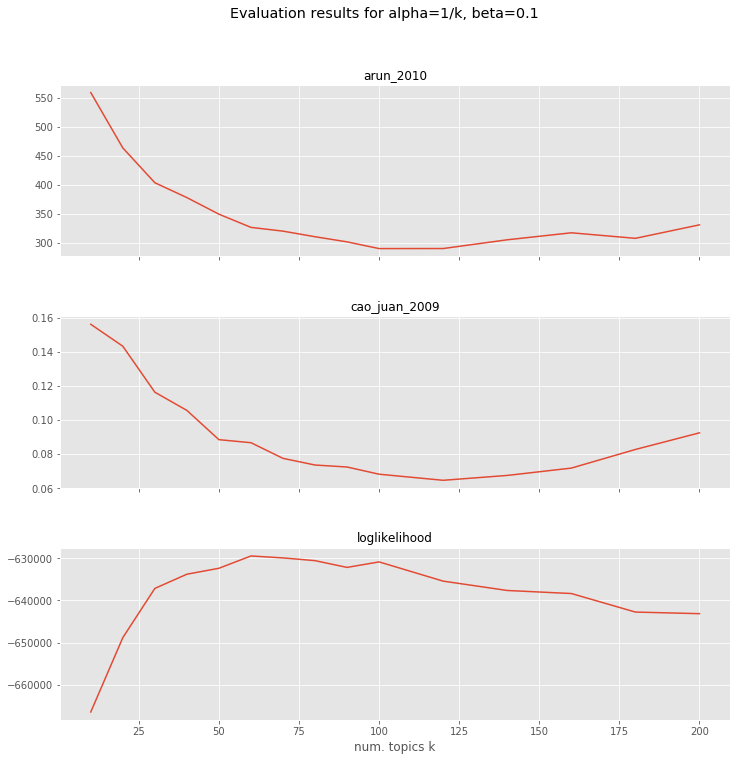

In [31]:
print('plotting evaluation results')
results_by_n_topics = results_by_parameter(eval_results2, 'n_topics')
plot_eval_results(results_by_n_topics, xaxislabel='num. topics k',
                  title='Evaluation results for alpha=1/k, beta=0.1', figsize=(12, 12))
#plt.savefig('data/lda_evaluation_plot.png')
plt.show()

In [32]:
caoTopics=caoScore=arunTopics=arunScore=999999
logScore=-999999
for res in results_by_n_topics:
    if res[1]['cao_juan_2009'] < caoScore:
        caoScore = res[1]['cao_juan_2009']
        caoTopics = res[0]
    if res[1]['arun_2010'] < arunScore:
        arunScore = res[1]['arun_2010']
        arunTopics = res[0]
    if res[1]['loglikelihood'] > logScore:
        logScore = res[1]['loglikelihood']
        logTopics = res[0]       
print("cao : %s \t %s" % (caoScore, caoTopics))        
print("arun: %s \t %s" % (arunScore, arunTopics))
print("log: %s \t %s" % (logScore, logTopics))

cao : 0.06474733161640048 	 120
arun: 289.72823442473526 	 100
log: -629442.2550425049 	 60


### alpha: 0.1 beta: 1/(10*k)

In [23]:
const_params = dict(n_iter=2000, alpha=0.1)
ks = list(range(10, 100, 10)) + list(range(100, 210, 20))
varying_params = [dict(n_topics=k, eta=1.0/(10*k)) for k in ks]

eval_results3 = tm_lda.evaluate_topic_models(dtm,
    varying_params,
    const_params)

INFO:lda:n_documents: 17227
INFO:lda:n_documents: 17227
INFO:lda:vocab_size: 5760
INFO:lda:n_documents: 17227
INFO:lda:n_documents: 17227
INFO:lda:n_documents: 17227
INFO:lda:vocab_size: 5760
INFO:lda:vocab_size: 5760
INFO:lda:n_words: 118219
INFO:lda:vocab_size: 5760
INFO:lda:n_words: 118219
INFO:lda:n_words: 118219
INFO:lda:n_documents: 17227
INFO:lda:n_words: 118219
INFO:lda:n_topics: 10
INFO:lda:n_topics: 40
INFO:lda:n_topics: 20
INFO:lda:vocab_size: 5760
INFO:lda:n_topics: 30
INFO:lda:vocab_size: 5760
INFO:lda:n_iter: 2000
INFO:lda:n_documents: 17227
INFO:lda:n_iter: 2000
INFO:lda:n_iter: 2000
INFO:lda:n_words: 118219
INFO:lda:n_words: 118219
INFO:lda:vocab_size: 5760
INFO:lda:n_documents: 17227
INFO:lda:n_iter: 2000
INFO:lda:n_documents: 17227
INFO:lda:n_topics: 60
INFO:lda:n_words: 118219
INFO:lda:vocab_size: 5760
INFO:lda:n_topics: 50
INFO:lda:n_iter: 2000
INFO:lda:n_documents: 17227
INFO:lda:n_topics: 70
INFO:lda:vocab_size: 5760
INFO:lda:vocab_size: 5760
INFO:lda:n_iter: 2000

INFO:lda:<120> log likelihood: -663034
INFO:lda:<10> log likelihood: -826010
INFO:lda:<30> log likelihood: -691940
INFO:lda:<30> log likelihood: -689565
INFO:lda:<60> log likelihood: -662955
INFO:lda:<20> log likelihood: -729733
INFO:lda:<130> log likelihood: -662868
INFO:lda:<40> log likelihood: -673853
INFO:lda:<80> log likelihood: -661127
INFO:lda:<20> log likelihood: -739986
INFO:lda:<140> log likelihood: -662808
INFO:lda:<10> log likelihood: -836929
INFO:lda:<70> log likelihood: -662085
INFO:lda:<30> log likelihood: -703884
INFO:lda:<150> log likelihood: -662805
INFO:lda:<90> log likelihood: -660865
INFO:lda:<160> log likelihood: -662322
INFO:lda:<10> log likelihood: -857698
INFO:lda:<50> log likelihood: -671528
INFO:lda:<80> log likelihood: -661177
INFO:lda:<40> log likelihood: -684833
INFO:lda:<100> log likelihood: -660400
INFO:lda:<170> log likelihood: -662240
INFO:lda:<40> log likelihood: -686397
INFO:lda:<30> log likelihood: -712469
INFO:lda:<180> log likelihood: -662018
INFO

INFO:lda:<170> log likelihood: -671201
INFO:lda:<290> log likelihood: -655237
INFO:lda:<630> log likelihood: -660578
INFO:lda:<410> log likelihood: -654965
INFO:lda:<150> log likelihood: -675335
INFO:lda:<640> log likelihood: -660910
INFO:lda:<300> log likelihood: -654536
INFO:lda:<420> log likelihood: -655318
INFO:lda:<230> log likelihood: -661303
INFO:lda:<650> log likelihood: -660991
INFO:lda:<120> log likelihood: -689205
INFO:lda:<180> log likelihood: -670740
INFO:lda:<660> log likelihood: -661030
INFO:lda:<140> log likelihood: -681995
INFO:lda:<50> log likelihood: -772740
INFO:lda:<430> log likelihood: -655176
INFO:lda:<310> log likelihood: -655064
INFO:lda:<670> log likelihood: -660875
INFO:lda:<110> log likelihood: -699889
INFO:lda:<440> log likelihood: -654988
INFO:lda:<240> log likelihood: -660894
INFO:lda:<160> log likelihood: -674917
INFO:lda:<680> log likelihood: -660943
INFO:lda:<100> log likelihood: -710494
INFO:lda:<320> log likelihood: -654721
INFO:lda:<690> log likelih

INFO:lda:<1150> log likelihood: -660893
INFO:lda:<240> log likelihood: -677715
INFO:lda:<1160> log likelihood: -660950
INFO:lda:<530> log likelihood: -652047
INFO:lda:<320> log likelihood: -668498
INFO:lda:<740> log likelihood: -654725
INFO:lda:<1170> log likelihood: -660753
INFO:lda:<1180> log likelihood: -660801
INFO:lda:<410> log likelihood: -659580
INFO:lda:<750> log likelihood: -654342
INFO:lda:<540> log likelihood: -651955
INFO:lda:<280> log likelihood: -672096
INFO:lda:<1190> log likelihood: -660871
INFO:lda:<100> log likelihood: -750824
INFO:lda:<210> log likelihood: -683420
INFO:lda:<170> log likelihood: -704604
INFO:lda:<1200> log likelihood: -660576
INFO:lda:<330> log likelihood: -668576
INFO:lda:<760> log likelihood: -654060
INFO:lda:<250> log likelihood: -677086
INFO:lda:<550> log likelihood: -652205
INFO:lda:<1210> log likelihood: -660712
INFO:lda:<420> log likelihood: -659708
INFO:lda:<190> log likelihood: -694506
INFO:lda:<90> log likelihood: -761920
INFO:lda:<1220> log

INFO:lda:<140> log likelihood: -746702
INFO:lda:<460> log likelihood: -667160
INFO:lda:<580> log likelihood: -658902
INFO:lda:<1060> log likelihood: -652980
INFO:lda:<110> log likelihood: -770712
INFO:lda:<1680> log likelihood: -660746
INFO:lda:<350> log likelihood: -675664
INFO:lda:<300> log likelihood: -680967
INFO:lda:<1070> log likelihood: -652984
INFO:lda:<1690> log likelihood: -660924
INFO:lda:<770> log likelihood: -651812
INFO:lda:<590> log likelihood: -658943
INFO:lda:<240> log likelihood: -700775
INFO:lda:<1700> log likelihood: -660672
INFO:lda:<470> log likelihood: -667409
INFO:lda:<400> log likelihood: -670333
INFO:lda:<1080> log likelihood: -652981
INFO:lda:<1710> log likelihood: -660539
INFO:lda:<780> log likelihood: -651518
INFO:lda:<1720> log likelihood: -660631
INFO:lda:<1090> log likelihood: -653014
INFO:lda:<600> log likelihood: -659093
INFO:lda:<270> log likelihood: -691431
INFO:lda:<1730> log likelihood: -660459
INFO:lda:<360> log likelihood: -675150
INFO:lda:<1740>

INFO:lda:<1410> log likelihood: -652799
INFO:lda:<460> log likelihood: -674338
INFO:lda:<350> log likelihood: -689902
INFO:lda:<620> log likelihood: -666614
INFO:lda:<780> log likelihood: -659039
INFO:lda:<1420> log likelihood: -652509
INFO:lda:<1020> log likelihood: -651914
INFO:lda:<220> log likelihood: -725848
INFO:lda:<1430> log likelihood: -652972
INFO:lda:<260> log likelihood: -710298
INFO:lda:<530> log likelihood: -669166
INFO:lda:<1030> log likelihood: -651922
INFO:lda:<790> log likelihood: -658955
INFO:lda:<400> log likelihood: -680345
INFO:lda:<320> log likelihood: -699129
INFO:lda:<630> log likelihood: -666425
INFO:lda:<1440> log likelihood: -652632
INFO:lda:<470> log likelihood: -674601
INFO:lda:<190> log likelihood: -743570
INFO:lda:<1040> log likelihood: -651436
INFO:lda:<1450> log likelihood: -652851
INFO:lda:<800> log likelihood: -659055
INFO:lda:<360> log likelihood: -689830
INFO:lda:<540> log likelihood: -669215
INFO:lda:<150> log likelihood: -764349
INFO:lda:<170> lo

INFO:lda:<1840> log likelihood: -652770
INFO:lda:<1020> log likelihood: -658835
INFO:lda:<1320> log likelihood: -651570
INFO:lda:<810> log likelihood: -665555
INFO:lda:<190> log likelihood: -761727
INFO:lda:<600> log likelihood: -673535
INFO:lda:<690> log likelihood: -669410
INFO:lda:<1850> log likelihood: -652952
INFO:lda:<1860> log likelihood: -652728
INFO:lda:<460> log likelihood: -687706
INFO:lda:<1330> log likelihood: -651970
INFO:lda:<520> log likelihood: -679629
INFO:lda:<1030> log likelihood: -659105
INFO:lda:<340> log likelihood: -707540
INFO:lda:<820> log likelihood: -666209
INFO:lda:<1870> log likelihood: -653010
INFO:lda:<1340> log likelihood: -651767
INFO:lda:<700> log likelihood: -668362
INFO:lda:<610> log likelihood: -673480
INFO:lda:<1880> log likelihood: -652473
INFO:lda:<1040> log likelihood: -658604
INFO:lda:<420> log likelihood: -697072
INFO:lda:<220> log likelihood: -749174
INFO:lda:<1350> log likelihood: -651949
INFO:lda:<1890> log likelihood: -652983
INFO:lda:<83

INFO:lda:<870> log likelihood: -667957
INFO:lda:<1020> log likelihood: -665483
INFO:lda:<1670> log likelihood: -651081
INFO:lda:<240> log likelihood: -756939
INFO:lda:<1290> log likelihood: -658711
INFO:lda:<520> log likelihood: -696353
INFO:lda:<360> log likelihood: -719735
INFO:lda:<1680> log likelihood: -650910
INFO:lda:<760> log likelihood: -673269
INFO:lda:<1030> log likelihood: -665321
INFO:lda:<660> log likelihood: -678287
INFO:lda:<880> log likelihood: -667928
INFO:lda:<580> log likelihood: -686673
INFO:lda:<1300> log likelihood: -658929
INFO:lda:<1690> log likelihood: -651248
INFO:lda:<310> log likelihood: -736232
INFO:lda:<1040> log likelihood: -665368
INFO:lda:<430> log likelihood: -705343
INFO:lda:<1700> log likelihood: -651265
INFO:lda:<1310> log likelihood: -658767
INFO:lda:<770> log likelihood: -673168
INFO:lda:<890> log likelihood: -668502
INFO:lda:<670> log likelihood: -678731
INFO:lda:<1710> log likelihood: -650785
INFO:lda:<530> log likelihood: -696081
INFO:lda:<1050

INFO:lda:<520> log likelihood: -704075
INFO:lda:<1580> log likelihood: -658818
INFO:lda:<1070> log likelihood: -668540
INFO:lda:<1270> log likelihood: -664780
INFO:lda:<710> log likelihood: -685184
INFO:lda:<930> log likelihood: -673663
INFO:lda:<810> log likelihood: -677778
INFO:lda:<1590> log likelihood: -658039
INFO:lda:<640> log likelihood: -695500
INFO:lda:<380> log likelihood: -733392
INFO:lda:<1280> log likelihood: -665465
INFO:lda:<1080> log likelihood: -668716
INFO:lda:<1600> log likelihood: -658325
INFO:lda:<940> log likelihood: -673399
INFO:lda:<450> log likelihood: -717256
INFO:lda:<820> log likelihood: -678473
INFO:lda:<300> log likelihood: -754957
INFO:lda:<530> log likelihood: -704618
INFO:lda:<720> log likelihood: -684869
INFO:lda:<1610> log likelihood: -658736
INFO:lda:<1290> log likelihood: -664945
INFO:lda:<950> log likelihood: -672906
INFO:lda:<1090> log likelihood: -668600
INFO:lda:<340> log likelihood: -740785
INFO:lda:<650> log likelihood: -695438
INFO:lda:<1620>

INFO:lda:<640> log likelihood: -703181
INFO:lda:<870> log likelihood: -684937
INFO:lda:<410> log likelihood: -738671
INFO:lda:<1310> log likelihood: -667542
INFO:lda:<1560> log likelihood: -664367
INFO:lda:<1960> log likelihood: -658325
INFO:lda:<1150> log likelihood: -673154
INFO:lda:<1570> log likelihood: -664691
INFO:lda:<1000> log likelihood: -677818
INFO:lda:<550> log likelihood: -715206
INFO:lda:<1970> log likelihood: -658363
INFO:lda:<1320> log likelihood: -668120
INFO:lda:<790> log likelihood: -694646
INFO:lda:<880> log likelihood: -685395
INFO:lda:<1160> log likelihood: -673047
INFO:lda:<1580> log likelihood: -664374
INFO:lda:<470> log likelihood: -728647
INFO:lda:<1980> log likelihood: -658095
INFO:lda:<1330> log likelihood: -668283
INFO:lda:<650> log likelihood: -703245
INFO:lda:<1010> log likelihood: -677464
INFO:lda:<1590> log likelihood: -664457
INFO:lda:<1990> log likelihood: -658388
INFO:lda:<370> log likelihood: -751709
INFO:lda:<1170> log likelihood: -673123
INFO:lda:

INFO:lda:<1590> log likelihood: -667070
INFO:lda:<950> log likelihood: -693965
INFO:lda:<1060> log likelihood: -684884
INFO:lda:<1900> log likelihood: -664217
INFO:lda:<780> log likelihood: -702312
INFO:lda:<1600> log likelihood: -666674
INFO:lda:<1220> log likelihood: -677299
INFO:lda:<1400> log likelihood: -672846
INFO:lda:<500> log likelihood: -737659
INFO:lda:<1910> log likelihood: -664518
INFO:lda:<670> log likelihood: -714084
INFO:lda:<960> log likelihood: -693539
INFO:lda:<1610> log likelihood: -666627
INFO:lda:<1070> log likelihood: -685105
INFO:lda:<1410> log likelihood: -672843
INFO:lda:<1230> log likelihood: -677362
INFO:lda:<1920> log likelihood: -663988
INFO:lda:<1620> log likelihood: -666763
INFO:lda:<450> log likelihood: -748872
INFO:lda:<570> log likelihood: -725973
INFO:lda:<790> log likelihood: -702095
INFO:lda:<1930> log likelihood: -664411
INFO:lda:<970> log likelihood: -693357
INFO:lda:<1420> log likelihood: -672822
INFO:lda:<1240> log likelihood: -677305
INFO:lda:

INFO:lda:<680> log likelihood: -723778
INFO:lda:<1680> log likelihood: -672364
INFO:lda:<940> log likelihood: -701365
INFO:lda:<600> log likelihood: -733805
INFO:lda:<1930> log likelihood: -666213
INFO:lda:<1470> log likelihood: -677481
INFO:lda:<800> log likelihood: -713292
INFO:lda:<1290> log likelihood: -684254
INFO:lda:<1160> log likelihood: -692852
INFO:lda:<1690> log likelihood: -672197
INFO:lda:<1940> log likelihood: -667143
INFO:lda:<540> log likelihood: -747457
INFO:lda:<1480> log likelihood: -676911
INFO:lda:<950> log likelihood: -700650
INFO:lda:<1950> log likelihood: -666774
INFO:lda:<1700> log likelihood: -673135
INFO:lda:<690> log likelihood: -722476
INFO:lda:<1300> log likelihood: -684317
INFO:lda:<1170> log likelihood: -692423
INFO:lda:<1490> log likelihood: -677370
INFO:lda:<810> log likelihood: -712757
INFO:lda:<1960> log likelihood: -666922
INFO:lda:<610> log likelihood: -732837
INFO:lda:<1710> log likelihood: -672509
INFO:lda:<960> log likelihood: -700951
INFO:lda:<

INFO:lda:<960> log likelihood: -711897
INFO:lda:<1770> log likelihood: -676557
INFO:lda:<1400> log likelihood: -692775
INFO:lda:<1780> log likelihood: -676799
INFO:lda:<1140> log likelihood: -701067
INFO:lda:<1550> log likelihood: -683756
INFO:lda:<730> log likelihood: -731363
INFO:lda:<970> log likelihood: -712270
INFO:lda:<650> log likelihood: -746320
INFO:lda:<830> log likelihood: -721845
INFO:lda:<1410> log likelihood: -692760
INFO:lda:<1790> log likelihood: -677146
INFO:lda:<1560> log likelihood: -683389
INFO:lda:<1150> log likelihood: -700039
INFO:lda:<1800> log likelihood: -676342
INFO:lda:<1420> log likelihood: -692237
INFO:lda:<1570> log likelihood: -683969
INFO:lda:<980> log likelihood: -711920
INFO:lda:<740> log likelihood: -731491
INFO:lda:<840> log likelihood: -721982
INFO:lda:<1810> log likelihood: -677360
INFO:lda:<1160> log likelihood: -700763
INFO:lda:<1430> log likelihood: -692284
INFO:lda:<1580> log likelihood: -683764
INFO:lda:<660> log likelihood: -746456
INFO:lda:

INFO:lda:<1020> log likelihood: -719891
INFO:lda:<1200> log likelihood: -711662
INFO:lda:<1930> log likelihood: -683242
INFO:lda:<910> log likelihood: -730937
INFO:lda:<1740> log likelihood: -692183
INFO:lda:<1420> log likelihood: -700655
INFO:lda:<1940> log likelihood: -683383
INFO:lda:<1030> log likelihood: -720265
INFO:lda:<1210> log likelihood: -711708
INFO:lda:<1750> log likelihood: -691845
INFO:lda:<810> log likelihood: -744250
INFO:lda:<1950> log likelihood: -683268
INFO:lda:<1430> log likelihood: -700988
INFO:lda:<1760> log likelihood: -692124
INFO:lda:<920> log likelihood: -730460
INFO:lda:<1960> log likelihood: -683358
INFO:lda:<1040> log likelihood: -720002
INFO:lda:<1220> log likelihood: -711682
INFO:lda:<1440> log likelihood: -700751
INFO:lda:<1770> log likelihood: -690903
INFO:lda:<1970> log likelihood: -682925
INFO:lda:<820> log likelihood: -743678
INFO:lda:<930> log likelihood: -730949
INFO:lda:<1230> log likelihood: -711741
INFO:lda:<1780> log likelihood: -691349
INFO:

INFO:lda:<1330> log likelihood: -719893
INFO:lda:<1850> log likelihood: -700615
INFO:lda:<1040> log likelihood: -741747
INFO:lda:<1560> log likelihood: -710921
INFO:lda:<1180> log likelihood: -729744
INFO:lda:<1860> log likelihood: -699939
INFO:lda:<1340> log likelihood: -719904
INFO:lda:<1570> log likelihood: -710827
INFO:lda:<1870> log likelihood: -700531
INFO:lda:<1050> log likelihood: -741562
INFO:lda:<1190> log likelihood: -729537
INFO:lda:<1580> log likelihood: -711462
INFO:lda:<1350> log likelihood: -719772
INFO:lda:<1880> log likelihood: -700139
INFO:lda:<1200> log likelihood: -729534
INFO:lda:<1590> log likelihood: -711118
INFO:lda:<1360> log likelihood: -719918
INFO:lda:<1890> log likelihood: -700185
INFO:lda:<1060> log likelihood: -741859
INFO:lda:<1900> log likelihood: -700759
INFO:lda:<1600> log likelihood: -711119
INFO:lda:<1210> log likelihood: -728858
INFO:lda:<1370> log likelihood: -719486
INFO:lda:<1070> log likelihood: -741685
INFO:lda:<1910> log likelihood: -700690


INFO:lda:<1610> log likelihood: -728132
INFO:lda:<1430> log likelihood: -740156
INFO:lda:<1840> log likelihood: -718273
INFO:lda:<1620> log likelihood: -728510
INFO:lda:<1440> log likelihood: -740325
INFO:lda:<1850> log likelihood: -718416
INFO:lda:<1630> log likelihood: -728587
INFO:lda:<1450> log likelihood: -739852
INFO:lda:<1860> log likelihood: -717415
INFO:lda:<1640> log likelihood: -728750
INFO:lda:<1870> log likelihood: -717772
INFO:lda:<1460> log likelihood: -739987
INFO:lda:<1650> log likelihood: -728303
INFO:lda:<1880> log likelihood: -717649
INFO:lda:<1470> log likelihood: -739963
INFO:lda:<1660> log likelihood: -729066
INFO:lda:<1890> log likelihood: -718167
INFO:lda:<1480> log likelihood: -739456
INFO:lda:<1900> log likelihood: -717839
INFO:lda:<1670> log likelihood: -728526
INFO:lda:<1910> log likelihood: -718309
INFO:lda:<1490> log likelihood: -739804
INFO:lda:<1680> log likelihood: -727763
INFO:lda:<1920> log likelihood: -718251
INFO:lda:<1690> log likelihood: -728325


plotting evaluation results


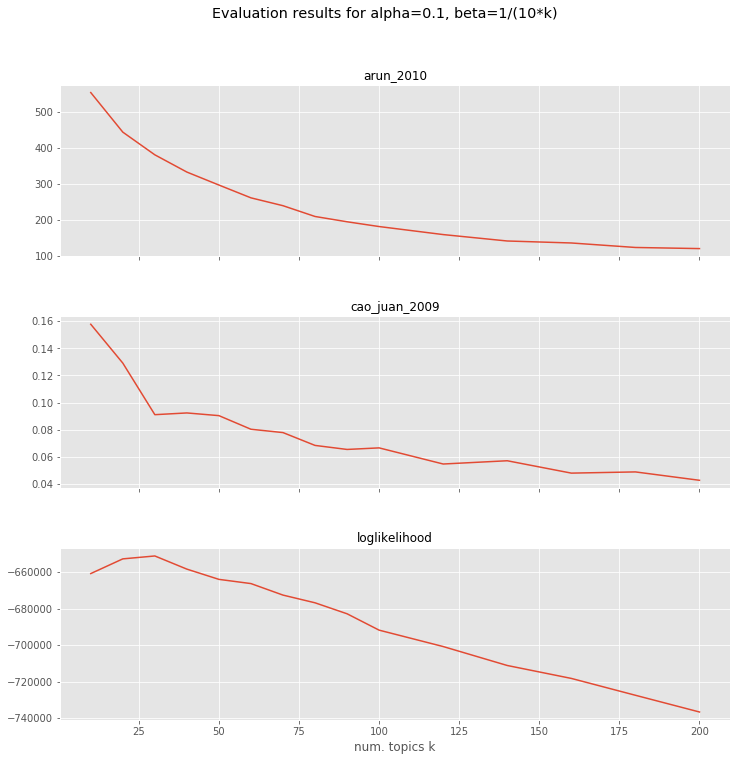

In [33]:
print('plotting evaluation results')
results_by_n_topics = results_by_parameter(eval_results3, 'n_topics')
plot_eval_results(results_by_n_topics, xaxislabel='num. topics k',
                  title='Evaluation results for alpha=0.1, beta=1/(10*k)', figsize=(12, 12))
#plt.savefig('data/lda_evaluation_plot.png')
plt.show()

In [34]:
caoTopics=caoScore=arunTopics=arunScore=999999
logScore=-999999
for res in results_by_n_topics:
    if res[1]['cao_juan_2009'] < caoScore:
        caoScore = res[1]['cao_juan_2009']
        caoTopics = res[0]
    if res[1]['arun_2010'] < arunScore:
        arunScore = res[1]['arun_2010']
        arunTopics = res[0]
    if res[1]['loglikelihood'] > logScore:
        logScore = res[1]['loglikelihood']
        logTopics = res[0]       
print("cao : %s \t %s" % (caoScore, caoTopics))        
print("arun: %s \t %s" % (arunScore, arunTopics))
print("log: %s \t %s" % (logScore, logTopics))

cao : 0.04263066357722161 	 200
arun: 120.36538648098309 	 200
log: -651188.5188881229 	 30


### alpha: 0.1 beta: 0.001

In [25]:
const_params = dict(n_iter=2000, alpha=0.1, eta=0.001)
ks = list(range(10, 100, 10)) + list(range(100, 210, 20))
varying_params = [dict(n_topics=k) for k in ks]

eval_results4 = tm_lda.evaluate_topic_models(dtm,
    varying_params,
    const_params)

INFO:lda:n_documents: 17227
INFO:lda:n_documents: 17227
INFO:lda:n_documents: 17227
INFO:lda:n_documents: 17227
INFO:lda:n_documents: 17227
INFO:lda:vocab_size: 5760
INFO:lda:vocab_size: 5760
INFO:lda:vocab_size: 5760
INFO:lda:n_words: 118219
INFO:lda:vocab_size: 5760
INFO:lda:vocab_size: 5760
INFO:lda:n_words: 118219
INFO:lda:n_words: 118219
INFO:lda:n_iter: 2000
INFO:lda:n_documents: 17227
INFO:lda:n_words: 118219
INFO:lda:n_topics: 30
INFO:lda:n_words: 118219
INFO:lda:n_iter: 2000
INFO:lda:n_documents: 17227
INFO:lda:n_words: 118219
INFO:lda:n_topics: 50
INFO:lda:vocab_size: 5760
INFO:lda:vocab_size: 5760
INFO:lda:n_topics: 40
INFO:lda:n_documents: 17227
INFO:lda:n_topics: 10
INFO:lda:n_iter: 2000
INFO:lda:n_topics: 20
INFO:lda:n_iter: 2000
INFO:lda:vocab_size: 5760
INFO:lda:n_documents: 17227
INFO:lda:n_words: 118219
INFO:lda:n_iter: 2000
INFO:lda:n_documents: 17227
INFO:lda:n_topics: 70
INFO:lda:n_words: 118219
INFO:lda:n_topics: 60
INFO:lda:n_iter: 2000
INFO:lda:vocab_size: 5760


INFO:lda:<80> log likelihood: -677174
INFO:lda:<30> log likelihood: -699685
INFO:lda:<20> log likelihood: -733817
INFO:lda:<20> log likelihood: -726309
INFO:lda:<140> log likelihood: -678698
INFO:lda:<40> log likelihood: -684487
INFO:lda:<10> log likelihood: -824794
INFO:lda:<40> log likelihood: -690057
INFO:lda:<60> log likelihood: -677055
INFO:lda:<90> log likelihood: -676594
INFO:lda:<150> log likelihood: -678059
INFO:lda:<20> log likelihood: -714588
INFO:lda:<160> log likelihood: -677433
INFO:lda:<70> log likelihood: -675349
INFO:lda:<20> log likelihood: -739986
INFO:lda:<100> log likelihood: -675634
INFO:lda:<170> log likelihood: -677067
INFO:lda:<50> log likelihood: -681170
INFO:lda:<50> log likelihood: -688036
INFO:lda:<40> log likelihood: -694633
INFO:lda:<180> log likelihood: -676437
INFO:lda:<110> log likelihood: -674525
INFO:lda:<10> log likelihood: -811239
INFO:lda:<80> log likelihood: -673952
INFO:lda:<20> log likelihood: -755367
INFO:lda:<190> log likelihood: -675835
INFO

INFO:lda:<290> log likelihood: -665610
INFO:lda:<390> log likelihood: -667805
INFO:lda:<650> log likelihood: -671786
INFO:lda:<100> log likelihood: -703272
INFO:lda:<160> log likelihood: -678512
INFO:lda:<400> log likelihood: -667612
INFO:lda:<660> log likelihood: -671654
INFO:lda:<120> log likelihood: -690770
INFO:lda:<230> log likelihood: -667192
INFO:lda:<300> log likelihood: -664657
INFO:lda:<130> log likelihood: -687900
INFO:lda:<200> log likelihood: -671617
INFO:lda:<670> log likelihood: -671982
INFO:lda:<410> log likelihood: -667066
INFO:lda:<680> log likelihood: -671857
INFO:lda:<240> log likelihood: -667415
INFO:lda:<310> log likelihood: -665110
INFO:lda:<420> log likelihood: -667356
INFO:lda:<690> log likelihood: -671750
INFO:lda:<80> log likelihood: -724830
INFO:lda:<210> log likelihood: -671331
INFO:lda:<170> log likelihood: -678388
INFO:lda:<700> log likelihood: -671847
INFO:lda:<430> log likelihood: -667543
INFO:lda:<130> log likelihood: -690232
INFO:lda:<100> log likelih

INFO:lda:<130> log likelihood: -716922
INFO:lda:<1150> log likelihood: -671238
INFO:lda:<190> log likelihood: -695666
INFO:lda:<100> log likelihood: -741439
INFO:lda:<720> log likelihood: -664330
INFO:lda:<520> log likelihood: -662662
INFO:lda:<1160> log likelihood: -671159
INFO:lda:<70> log likelihood: -771052
INFO:lda:<420> log likelihood: -664624
INFO:lda:<360> log likelihood: -668854
INFO:lda:<1170> log likelihood: -670845
INFO:lda:<730> log likelihood: -664909
INFO:lda:<1180> log likelihood: -671175
INFO:lda:<530> log likelihood: -662307
INFO:lda:<240> log likelihood: -683979
INFO:lda:<280> log likelihood: -674749
INFO:lda:<1190> log likelihood: -671002
INFO:lda:<740> log likelihood: -664831
INFO:lda:<430> log likelihood: -664376
INFO:lda:<220> log likelihood: -683833
INFO:lda:<370> log likelihood: -668335
INFO:lda:<1200> log likelihood: -670498
INFO:lda:<540> log likelihood: -662071
INFO:lda:<750> log likelihood: -664315
INFO:lda:<1210> log likelihood: -670785
INFO:lda:<170> log 

INFO:lda:<230> log likelihood: -700909
INFO:lda:<340> log likelihood: -681057
INFO:lda:<1020> log likelihood: -664444
INFO:lda:<1660> log likelihood: -670585
INFO:lda:<760> log likelihood: -660485
INFO:lda:<1670> log likelihood: -670246
INFO:lda:<600> log likelihood: -662138
INFO:lda:<1030> log likelihood: -664183
INFO:lda:<1680> log likelihood: -670499
INFO:lda:<510> log likelihood: -667286
INFO:lda:<400> log likelihood: -672683
INFO:lda:<1690> log likelihood: -670652
INFO:lda:<770> log likelihood: -660545
INFO:lda:<320> log likelihood: -683044
INFO:lda:<1040> log likelihood: -664388
INFO:lda:<190> log likelihood: -712421
INFO:lda:<280> log likelihood: -692855
INFO:lda:<1700> log likelihood: -670740
INFO:lda:<610> log likelihood: -662426
INFO:lda:<1710> log likelihood: -670473
INFO:lda:<350> log likelihood: -680831
INFO:lda:<1050> log likelihood: -664349
INFO:lda:<780> log likelihood: -660461
INFO:lda:<520> log likelihood: -667176
INFO:lda:<1720> log likelihood: -670647
INFO:lda:<1060

INFO:lda:<780> log likelihood: -661484
INFO:lda:<140> log likelihood: -757740
INFO:lda:<410> log likelihood: -680826
INFO:lda:<1370> log likelihood: -663725
INFO:lda:<670> log likelihood: -666695
INFO:lda:<1010> log likelihood: -660505
INFO:lda:<790> log likelihood: -661727
INFO:lda:<310> log likelihood: -699484
INFO:lda:<1380> log likelihood: -663434
INFO:lda:<250> log likelihood: -710337
INFO:lda:<530> log likelihood: -671432
INFO:lda:<460> log likelihood: -679159
INFO:lda:<1020> log likelihood: -660348
INFO:lda:<1390> log likelihood: -663372
INFO:lda:<680> log likelihood: -665410
INFO:lda:<210> log likelihood: -720874
INFO:lda:<800> log likelihood: -661680
INFO:lda:<1030> log likelihood: -660079
INFO:lda:<420> log likelihood: -680585
INFO:lda:<1400> log likelihood: -663496
INFO:lda:<370> log likelihood: -691449
INFO:lda:<810> log likelihood: -661323
INFO:lda:<170> log likelihood: -742183
INFO:lda:<690> log likelihood: -666257
INFO:lda:<540> log likelihood: -670803
INFO:lda:<1410> lo

INFO:lda:<1020> log likelihood: -661546
INFO:lda:<470> log likelihood: -690183
INFO:lda:<400> log likelihood: -697448
INFO:lda:<1310> log likelihood: -659526
INFO:lda:<870> log likelihood: -665502
INFO:lda:<1800> log likelihood: -663455
INFO:lda:<690> log likelihood: -670308
INFO:lda:<1320> log likelihood: -659817
INFO:lda:<600> log likelihood: -678399
INFO:lda:<1810> log likelihood: -663695
INFO:lda:<250> log likelihood: -729492
INFO:lda:<1030> log likelihood: -661412
INFO:lda:<540> log likelihood: -680196
INFO:lda:<330> log likelihood: -707642
INFO:lda:<190> log likelihood: -752348
INFO:lda:<1820> log likelihood: -663967
INFO:lda:<880> log likelihood: -665101
INFO:lda:<1330> log likelihood: -659924
INFO:lda:<1830> log likelihood: -663086
INFO:lda:<480> log likelihood: -690079
INFO:lda:<1040> log likelihood: -661233
INFO:lda:<700> log likelihood: -670163
INFO:lda:<1840> log likelihood: -663273
INFO:lda:<410> log likelihood: -696408
INFO:lda:<220> log likelihood: -738712
INFO:lda:<280>

INFO:lda:<1070> log likelihood: -664716
INFO:lda:<420> log likelihood: -705406
INFO:lda:<670> log likelihood: -679170
INFO:lda:<1640> log likelihood: -659635
INFO:lda:<1280> log likelihood: -661492
INFO:lda:<270> log likelihood: -737817
INFO:lda:<750> log likelihood: -677245
INFO:lda:<1650> log likelihood: -659335
INFO:lda:<870> log likelihood: -669048
INFO:lda:<1290> log likelihood: -661017
INFO:lda:<1080> log likelihood: -664246
INFO:lda:<240> log likelihood: -748028
INFO:lda:<510> log likelihood: -696277
INFO:lda:<1660> log likelihood: -659193
INFO:lda:<600> log likelihood: -688920
INFO:lda:<680> log likelihood: -679362
INFO:lda:<1300> log likelihood: -661298
INFO:lda:<760> log likelihood: -677261
INFO:lda:<350> log likelihood: -716475
INFO:lda:<1090> log likelihood: -664563
INFO:lda:<1670> log likelihood: -659601
INFO:lda:<320> log likelihood: -727102
INFO:lda:<880> log likelihood: -669149
INFO:lda:<430> log likelihood: -704923
INFO:lda:<1310> log likelihood: -660563
INFO:lda:<1680

INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.104848
INFO:lda:<430> log likelihood: -713069
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 374.004230
INFO:lda:<820> log likelihood: -679362
INFO:lda:<1570> log likelihood: -660483
INFO:lda:<1320> log likelihood: -664198
INFO:lda:<1070> log likelihood: -668934
INFO:lda:<930> log likelihood: -676959
INFO:lda:<730> log likelihood: -687937
INFO:lda:<1580> log likelihood: -660569
INFO:lda:<390> log likelihood: -725353
INFO:lda:<630> log likelihood: -695088
INFO:lda:<520> log likelihood: -703604
INFO:lda:<1330> log likelihood: -664584
INFO:lda:<1080> log likelihood: -669165
INFO:lda:<830> log likelihood: -678868
INFO:lda:<1590> log likelihood: -660717
INFO:lda:<940> log likelihood: -677485
INFO:lda:<340> log likelihood: -735488
INFO:lda:<1340> log likelihood: -664439
INFO:lda:<740> log likelihood: -688143
INFO:lda:<300> log likelihood: -744486
INFO:lda:<1600> log likelihood: -659881
INFO:lda:<440> log likelihoo

INFO:lda:<890> log likelihood: -687345
INFO:lda:<1610> log likelihood: -663932
INFO:lda:<1910> log likelihood: -660335
INFO:lda:<1010> log likelihood: -677831
INFO:lda:<360> log likelihood: -742213
INFO:lda:<1310> log likelihood: -668586
INFO:lda:<1140> log likelihood: -677200
INFO:lda:<640> log likelihood: -702421
INFO:lda:<1620> log likelihood: -663507
INFO:lda:<1920> log likelihood: -659656
INFO:lda:<780> log likelihood: -694640
INFO:lda:<900> log likelihood: -687017
INFO:lda:<480> log likelihood: -725100
INFO:lda:<540> log likelihood: -711029
INFO:lda:<1020> log likelihood: -677379
INFO:lda:<1320> log likelihood: -668906
INFO:lda:<1150> log likelihood: -676666
INFO:lda:<1630> log likelihood: -663819
INFO:lda:<1930> log likelihood: -660061
INFO:lda:<1940> log likelihood: -659789
INFO:lda:<1330> log likelihood: -669155
INFO:lda:<790> log likelihood: -694646
INFO:lda:<1640> log likelihood: -664154
INFO:lda:<910> log likelihood: -687173
INFO:lda:<650> log likelihood: -702473
INFO:lda:<

INFO:lda:<1370> log likelihood: -676711
INFO:lda:<1940> log likelihood: -663729
INFO:lda:<1580> log likelihood: -668518
INFO:lda:<650> log likelihood: -710950
INFO:lda:<500> log likelihood: -733578
INFO:lda:<1220> log likelihood: -677184
INFO:lda:<1950> log likelihood: -663791
INFO:lda:<1090> log likelihood: -686989
INFO:lda:<1380> log likelihood: -676238
INFO:lda:<950> log likelihood: -693965
INFO:lda:<1590> log likelihood: -668420
INFO:lda:<1960> log likelihood: -663015
INFO:lda:<580> log likelihood: -722630
INFO:lda:<780> log likelihood: -702011
INFO:lda:<1230> log likelihood: -677142
INFO:lda:<440> log likelihood: -741034
INFO:lda:<1970> log likelihood: -662571
INFO:lda:<1100> log likelihood: -687168
INFO:lda:<1600> log likelihood: -668465
INFO:lda:<1390> log likelihood: -676674
INFO:lda:<660> log likelihood: -711076
INFO:lda:<960> log likelihood: -693539
INFO:lda:<1980> log likelihood: -662986
INFO:lda:<1610> log likelihood: -668720
INFO:lda:<1240> log likelihood: -678161
INFO:lda

INFO:lda:<790> log likelihood: -709577
INFO:lda:<1920> log likelihood: -668007
INFO:lda:<1660> log likelihood: -676038
INFO:lda:<530> log likelihood: -739682
INFO:lda:<940> log likelihood: -701381
INFO:lda:<1480> log likelihood: -677297
INFO:lda:<1150> log likelihood: -693018
INFO:lda:<1320> log likelihood: -685148
INFO:lda:<1930> log likelihood: -668165
INFO:lda:<1670> log likelihood: -676140
INFO:lda:<700> log likelihood: -721099
INFO:lda:<610> log likelihood: -732070
INFO:lda:<1490> log likelihood: -677432
INFO:lda:<800> log likelihood: -709845
INFO:lda:<1940> log likelihood: -668420
INFO:lda:<1160> log likelihood: -692852
INFO:lda:<1680> log likelihood: -676390
INFO:lda:<1330> log likelihood: -685344
INFO:lda:<950> log likelihood: -700896
INFO:lda:<1500> log likelihood: -676503
INFO:lda:<1950> log likelihood: -668463
INFO:lda:<1690> log likelihood: -675988
INFO:lda:<1170> log likelihood: -692423
INFO:lda:<540> log likelihood: -739538
INFO:lda:<1340> log likelihood: -685505
INFO:lda

INFO:lda:<1570> log likelihood: -684100
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 231.842029
INFO:lda:<1800> log likelihood: -676704
INFO:lda:<1130> log likelihood: -700720
INFO:lda:<960> log likelihood: -708861
INFO:lda:<1810> log likelihood: -676959
INFO:lda:<1390> log likelihood: -692501
INFO:lda:<1580> log likelihood: -684373
INFO:lda:<730> log likelihood: -731307
INFO:lda:<840> log likelihood: -720758
INFO:lda:<640> log likelihood: -737422
INFO:lda:<1140> log likelihood: -700675
INFO:lda:<1820> log likelihood: -677190
INFO:lda:<1590> log likelihood: -684277
INFO:lda:<1400> log likelihood: -692775
INFO:lda:<970> log likelihood: -709083
INFO:lda:<1830> log likelihood: -676709
INFO:lda:<1150> log likelihood: -700303
INFO:lda:<1600> log likelihood: -684292
INFO:lda:<850> log likelihood: -720717
INFO:lda:<1410> log likelihood: -692760
INFO:lda:<740> log likelihood: -731178
INFO:lda:<1840> log likelihood: -676556
INFO:lda:<650> log likelihood: -737435
INFO:lda:<980> lo

INFO:lda:<1950> log likelihood: -684206
INFO:lda:<1410> log likelihood: -701016
INFO:lda:<1040> log likelihood: -720322
INFO:lda:<1730> log likelihood: -692163
INFO:lda:<1960> log likelihood: -683467
INFO:lda:<910> log likelihood: -730538
INFO:lda:<1200> log likelihood: -708586
INFO:lda:<800> log likelihood: -736701
INFO:lda:<1420> log likelihood: -701354
INFO:lda:<1970> log likelihood: -683481
INFO:lda:<1740> log likelihood: -692183
INFO:lda:<1050> log likelihood: -719821
INFO:lda:<1210> log likelihood: -707980
INFO:lda:<1430> log likelihood: -701695
INFO:lda:<1980> log likelihood: -683155
INFO:lda:<920> log likelihood: -730626
INFO:lda:<1750> log likelihood: -691845
INFO:lda:<810> log likelihood: -736709
INFO:lda:<1990> log likelihood: -683699
INFO:lda:<1060> log likelihood: -719902
INFO:lda:<1440> log likelihood: -701506
INFO:lda:<1760> log likelihood: -692124
INFO:lda:<1220> log likelihood: -708680
INFO:lda:<1999> log likelihood: -683664
INFO:tmtoolkit:> evaluation result with metr

INFO:lda:<1030> log likelihood: -735602
INFO:lda:<1840> log likelihood: -700812
INFO:lda:<1550> log likelihood: -707348
INFO:lda:<1850> log likelihood: -700859
INFO:lda:<1190> log likelihood: -729186
INFO:lda:<1560> log likelihood: -707505
INFO:lda:<1360> log likelihood: -718668
INFO:lda:<1040> log likelihood: -735678
INFO:lda:<1860> log likelihood: -700949
INFO:lda:<1570> log likelihood: -707299
INFO:lda:<1200> log likelihood: -729335
INFO:lda:<1370> log likelihood: -718722
INFO:lda:<1870> log likelihood: -700924
INFO:lda:<1050> log likelihood: -736325
INFO:lda:<1580> log likelihood: -707550
INFO:lda:<1880> log likelihood: -700332
INFO:lda:<1210> log likelihood: -728712
INFO:lda:<1380> log likelihood: -718436
INFO:lda:<1890> log likelihood: -700756
INFO:lda:<1590> log likelihood: -707761
INFO:lda:<1060> log likelihood: -735762
INFO:lda:<1900> log likelihood: -700414
INFO:lda:<1220> log likelihood: -729343
INFO:lda:<1600> log likelihood: -707632
INFO:lda:<1390> log likelihood: -718646


INFO:lda:<1620> log likelihood: -727442
INFO:lda:<1850> log likelihood: -717520
INFO:lda:<1420> log likelihood: -734763
INFO:lda:<1630> log likelihood: -727658
INFO:lda:<1860> log likelihood: -717595
INFO:lda:<1430> log likelihood: -734968
INFO:lda:<1640> log likelihood: -727715
INFO:lda:<1870> log likelihood: -717491
INFO:lda:<1440> log likelihood: -735187
INFO:lda:<1650> log likelihood: -727689
INFO:lda:<1880> log likelihood: -716893
INFO:lda:<1660> log likelihood: -727560
INFO:lda:<1450> log likelihood: -735424
INFO:lda:<1890> log likelihood: -717635
INFO:lda:<1670> log likelihood: -727293
INFO:lda:<1900> log likelihood: -717671
INFO:lda:<1460> log likelihood: -734968
INFO:lda:<1680> log likelihood: -727195
INFO:lda:<1910> log likelihood: -717497
INFO:lda:<1470> log likelihood: -735540
INFO:lda:<1920> log likelihood: -717109
INFO:lda:<1690> log likelihood: -727600
INFO:lda:<1480> log likelihood: -735375
INFO:lda:<1930> log likelihood: -717428
INFO:lda:<1700> log likelihood: -727940


plotting evaluation results


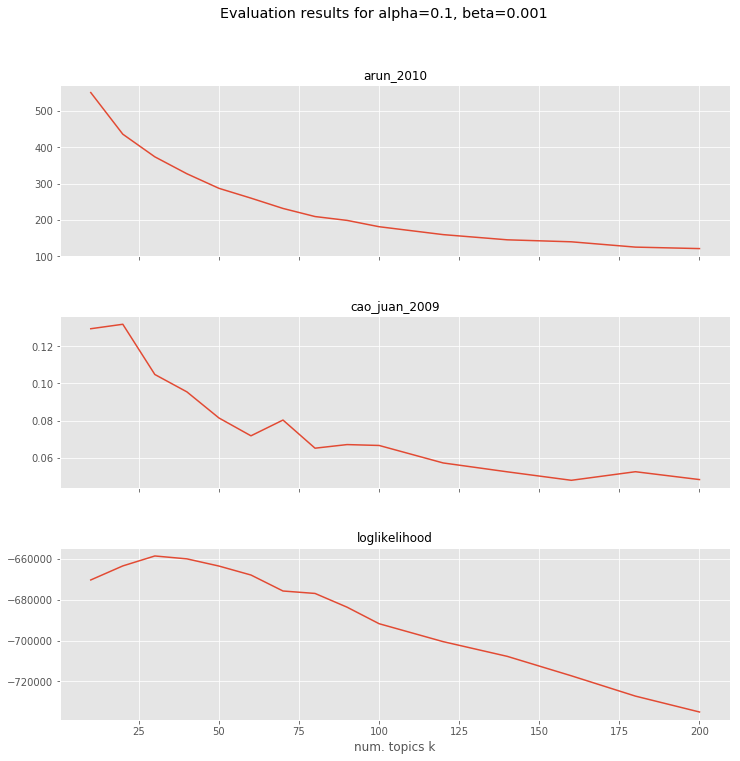

In [35]:
print('plotting evaluation results')
results_by_n_topics = results_by_parameter(eval_results4, 'n_topics')
plot_eval_results(results_by_n_topics, xaxislabel='num. topics k',
                  title='Evaluation results for alpha=0.1, beta=0.001', figsize=(12, 12))
#plt.savefig('data/lda_evaluation_plot.png')
plt.show()

In [36]:
caoTopics=caoScore=arunTopics=arunScore=999999
logScore=-999999
for res in results_by_n_topics:
    if res[1]['cao_juan_2009'] < caoScore:
        caoScore = res[1]['cao_juan_2009']
        caoTopics = res[0]
    if res[1]['arun_2010'] < arunScore:
        arunScore = res[1]['arun_2010']
        arunTopics = res[0]
    if res[1]['loglikelihood'] > logScore:
        logScore = res[1]['loglikelihood']
        logTopics = res[0]       
print("cao : %s \t %s" % (caoScore, caoTopics))        
print("arun: %s \t %s" % (arunScore, arunTopics))
print("log: %s \t %s" % (logScore, logTopics))

cao : 0.04774458037194569 	 160
arun: 121.25059621097208 	 200
log: -658676.9105703351 	 30


### alpha: 1/k beta: 1/(10*k)

In [27]:
const_params = dict(n_iter=2000)
ks = list(range(10, 100, 10)) + list(range(100, 210, 20))
varying_params = [dict(n_topics=k, alpha=1.0/k, eta=1.0/(10*k)) for k in ks]

eval_results5 = tm_lda.evaluate_topic_models(dtm,
    varying_params,
    const_params)

INFO:lda:n_documents: 17227
INFO:lda:n_documents: 17227
INFO:lda:vocab_size: 5760
INFO:lda:n_documents: 17227
INFO:lda:vocab_size: 5760
INFO:lda:n_words: 118219
INFO:lda:n_words: 118219
INFO:lda:vocab_size: 5760
INFO:lda:n_documents: 17227
INFO:lda:n_topics: 10
INFO:lda:n_words: 118219
INFO:lda:n_documents: 17227
INFO:lda:n_topics: 20
INFO:lda:n_iter: 2000
INFO:lda:n_documents: 17227
INFO:lda:vocab_size: 5760
INFO:lda:n_iter: 2000
INFO:lda:n_topics: 30
INFO:lda:vocab_size: 5760
INFO:lda:n_words: 118219
INFO:lda:n_iter: 2000
INFO:lda:vocab_size: 5760
INFO:lda:n_documents: 17227
INFO:lda:n_documents: 17227
INFO:lda:n_topics: 40
INFO:lda:n_words: 118219
INFO:lda:n_words: 118219
INFO:lda:n_documents: 17227
INFO:lda:n_topics: 50
INFO:lda:vocab_size: 5760
INFO:lda:vocab_size: 5760
INFO:lda:vocab_size: 5760
INFO:lda:n_topics: 60
INFO:lda:n_words: 118219
INFO:lda:n_iter: 2000
INFO:lda:n_iter: 2000
INFO:lda:n_words: 118219
INFO:lda:n_iter: 2000
INFO:lda:n_documents: 17227
INFO:lda:n_words: 1182

INFO:lda:<40> log likelihood: -640036
INFO:lda:<100> log likelihood: -663213
INFO:lda:<20> log likelihood: -671204
INFO:lda:<10> log likelihood: -735213
INFO:lda:<80> log likelihood: -636081
INFO:lda:<110> log likelihood: -662986
INFO:lda:<60> log likelihood: -627716
INFO:lda:<40> log likelihood: -639276
INFO:lda:<120> log likelihood: -663034
INFO:lda:<20> log likelihood: -670124
INFO:lda:<90> log likelihood: -635369
INFO:lda:<130> log likelihood: -662868
INFO:lda:<50> log likelihood: -633291
INFO:lda:<10> log likelihood: -734751
INFO:lda:<70> log likelihood: -626340
INFO:lda:<140> log likelihood: -662808
INFO:lda:<100> log likelihood: -634869
INFO:lda:<40> log likelihood: -631564
INFO:lda:<30> log likelihood: -643616
INFO:lda:<150> log likelihood: -662805
INFO:lda:<30> log likelihood: -643832
INFO:lda:<50> log likelihood: -631551
INFO:lda:<60> log likelihood: -628478
INFO:lda:<110> log likelihood: -633911
INFO:lda:<20> log likelihood: -663417
INFO:lda:<160> log likelihood: -662322
INF

INFO:lda:<630> log likelihood: -660578
INFO:lda:<60> log likelihood: -614256
INFO:lda:<290> log likelihood: -617456
INFO:lda:<640> log likelihood: -660910
INFO:lda:<410> log likelihood: -631042
INFO:lda:<230> log likelihood: -612265
INFO:lda:<650> log likelihood: -660991
INFO:lda:<420> log likelihood: -631163
INFO:lda:<130> log likelihood: -594841
INFO:lda:<300> log likelihood: -617818
INFO:lda:<660> log likelihood: -661030
INFO:lda:<190> log likelihood: -600281
INFO:lda:<40> log likelihood: -623298
INFO:lda:<670> log likelihood: -660875
INFO:lda:<160> log likelihood: -598948
INFO:lda:<430> log likelihood: -631383
INFO:lda:<120> log likelihood: -595658
INFO:lda:<240> log likelihood: -612326
INFO:lda:<680> log likelihood: -660943
INFO:lda:<310> log likelihood: -617159
INFO:lda:<440> log likelihood: -630900
INFO:lda:<690> log likelihood: -660707
INFO:lda:<110> log likelihood: -597098
INFO:lda:<200> log likelihood: -600065
INFO:lda:<100> log likelihood: -601328
INFO:lda:<700> log likeliho

INFO:lda:<80> log likelihood: -598851
INFO:lda:<520> log likelihood: -616861
INFO:lda:<410> log likelihood: -610056
INFO:lda:<740> log likelihood: -630247
INFO:lda:<1160> log likelihood: -660950
INFO:lda:<1170> log likelihood: -660753
INFO:lda:<110> log likelihood: -595617
INFO:lda:<280> log likelihood: -593774
INFO:lda:<750> log likelihood: -630260
INFO:lda:<210> log likelihood: -585810
INFO:lda:<530> log likelihood: -616308
INFO:lda:<1180> log likelihood: -660801
INFO:lda:<340> log likelihood: -596970
INFO:lda:<420> log likelihood: -610048
INFO:lda:<190> log likelihood: -586349
INFO:lda:<1190> log likelihood: -660871
INFO:lda:<760> log likelihood: -630180
INFO:lda:<170> log likelihood: -589282
INFO:lda:<240> log likelihood: -587656
INFO:lda:<1200> log likelihood: -660576
INFO:lda:<540> log likelihood: -616660
INFO:lda:<100> log likelihood: -597798
INFO:lda:<770> log likelihood: -631006
INFO:lda:<1210> log likelihood: -660712
INFO:lda:<430> log likelihood: -610003
INFO:lda:<350> log l

INFO:lda:<590> log likelihood: -608335
INFO:lda:<190> log likelihood: -583756
INFO:lda:<1070> log likelihood: -630229
INFO:lda:<1680> log likelihood: -660746
INFO:lda:<270> log likelihood: -581101
INFO:lda:<400> log likelihood: -591258
INFO:lda:<760> log likelihood: -616076
INFO:lda:<1690> log likelihood: -660924
INFO:lda:<300> log likelihood: -582853
INFO:lda:<1080> log likelihood: -630039
INFO:lda:<340> log likelihood: -584982
INFO:lda:<240> log likelihood: -584180
INFO:lda:<1700> log likelihood: -660672
INFO:lda:<160> log likelihood: -585400
INFO:lda:<600> log likelihood: -607941
INFO:lda:<140> log likelihood: -590012
INFO:lda:<490> log likelihood: -596027
INFO:lda:<120> log likelihood: -587874
INFO:lda:<1710> log likelihood: -660539
INFO:lda:<1090> log likelihood: -630037
INFO:lda:<770> log likelihood: -615826
INFO:lda:<1720> log likelihood: -660631
INFO:lda:<1100> log likelihood: -630354
INFO:lda:<410> log likelihood: -590866
INFO:lda:<1730> log likelihood: -660459
INFO:lda:<610> 

INFO:lda:<1000> log likelihood: -615782
INFO:lda:<640> log likelihood: -596040
INFO:lda:<140> log likelihood: -590339
INFO:lda:<1420> log likelihood: -630094
INFO:lda:<210> log likelihood: -580118
INFO:lda:<1010> log likelihood: -616062
INFO:lda:<450> log likelihood: -583042
INFO:lda:<1430> log likelihood: -630336
INFO:lda:<790> log likelihood: -607300
INFO:lda:<540> log likelihood: -589835
INFO:lda:<400> log likelihood: -580577
INFO:lda:<360> log likelihood: -578059
INFO:lda:<1440> log likelihood: -629744
INFO:lda:<160> log likelihood: -582855
INFO:lda:<650> log likelihood: -595466
INFO:lda:<1020> log likelihood: -615845
INFO:lda:<1450> log likelihood: -630035
INFO:lda:<800> log likelihood: -607809
INFO:lda:<1030> log likelihood: -616239
INFO:lda:<1460> log likelihood: -630213
INFO:lda:<320> log likelihood: -579848
INFO:lda:<550> log likelihood: -589833
INFO:lda:<460> log likelihood: -583063
INFO:lda:<660> log likelihood: -595542
INFO:lda:<1470> log likelihood: -630632
INFO:lda:<260> 

INFO:lda:<1850> log likelihood: -630205
INFO:lda:<830> log likelihood: -594253
INFO:lda:<410> log likelihood: -577126
INFO:lda:<1860> log likelihood: -630283
INFO:lda:<1320> log likelihood: -615130
INFO:lda:<1020> log likelihood: -606750
INFO:lda:<700> log likelihood: -589126
INFO:lda:<590> log likelihood: -582185
INFO:lda:<1870> log likelihood: -630307
INFO:lda:<520> log likelihood: -579734
INFO:lda:<1330> log likelihood: -615894
INFO:lda:<840> log likelihood: -593926
INFO:lda:<330> log likelihood: -575818
INFO:lda:<1030> log likelihood: -606784
INFO:lda:<1880> log likelihood: -629875
INFO:lda:<470> log likelihood: -576719
INFO:lda:<210> log likelihood: -577674
INFO:lda:<710> log likelihood: -589299
INFO:lda:<1340> log likelihood: -615597
INFO:lda:<1890> log likelihood: -630091
INFO:lda:<1040> log likelihood: -606304
INFO:lda:<600> log likelihood: -581896
INFO:lda:<850> log likelihood: -594057
INFO:lda:<420> log likelihood: -576960
INFO:lda:<1900> log likelihood: -629900
INFO:lda:<190

INFO:lda:<870> log likelihood: -588701
INFO:lda:<260> log likelihood: -575086
INFO:lda:<580> log likelihood: -575002
INFO:lda:<750> log likelihood: -581323
INFO:lda:<1670> log likelihood: -614913
INFO:lda:<1060> log likelihood: -594255
INFO:lda:<1300> log likelihood: -606212
INFO:lda:<1680> log likelihood: -615180
INFO:lda:<880> log likelihood: -588554
INFO:lda:<520> log likelihood: -575908
INFO:lda:<310> log likelihood: -576874
INFO:lda:<1310> log likelihood: -605954
INFO:lda:<350> log likelihood: -572310
INFO:lda:<1070> log likelihood: -593484
INFO:lda:<660> log likelihood: -578134
INFO:lda:<1690> log likelihood: -614993
INFO:lda:<760> log likelihood: -581545
INFO:lda:<590> log likelihood: -575358
INFO:lda:<420> log likelihood: -573420
INFO:lda:<1320> log likelihood: -605656
INFO:lda:<890> log likelihood: -588105
INFO:lda:<1700> log likelihood: -615297
INFO:lda:<1080> log likelihood: -593983
INFO:lda:<1330> log likelihood: -606691
INFO:lda:<670> log likelihood: -577657
INFO:lda:<530>

INFO:lda:<1070> log likelihood: -587812
INFO:lda:<1300> log likelihood: -593412
INFO:lda:<710> log likelihood: -573963
INFO:lda:<320> log likelihood: -571728
INFO:lda:<1600> log likelihood: -605776
INFO:lda:<930> log likelihood: -580951
INFO:lda:<810> log likelihood: -576388
INFO:lda:<1310> log likelihood: -593884
INFO:lda:<430> log likelihood: -570268
INFO:lda:<640> log likelihood: -573346
INFO:lda:<1080> log likelihood: -588121
INFO:lda:<290> log likelihood: -576343
INFO:lda:<1610> log likelihood: -605958
INFO:lda:<380> log likelihood: -573051
INFO:lda:<1320> log likelihood: -593513
INFO:lda:<520> log likelihood: -571654
INFO:lda:<940> log likelihood: -580898
INFO:lda:<720> log likelihood: -574501
INFO:lda:<1620> log likelihood: -605644
INFO:lda:<820> log likelihood: -576638
INFO:lda:<1090> log likelihood: -588509
INFO:lda:<1330> log likelihood: -594115
INFO:lda:<1630> log likelihood: -605610
INFO:lda:<650> log likelihood: -573324
INFO:lda:<950> log likelihood: -580535
INFO:lda:<1100

INFO:lda:<1960> log likelihood: -605850
INFO:lda:<870> log likelihood: -573779
INFO:lda:<1320> log likelihood: -587243
INFO:lda:<990> log likelihood: -576193
INFO:lda:<1610> log likelihood: -593713
INFO:lda:<1970> log likelihood: -606089
INFO:lda:<1140> log likelihood: -580547
INFO:lda:<1330> log likelihood: -587788
INFO:lda:<1620> log likelihood: -593510
INFO:lda:<1980> log likelihood: -605768
INFO:lda:<530> log likelihood: -567545
INFO:lda:<880> log likelihood: -573728
INFO:lda:<1000> log likelihood: -575979
INFO:lda:<790> log likelihood: -572136
INFO:lda:<1150> log likelihood: -580825
INFO:lda:<640> log likelihood: -570506
INFO:lda:<1990> log likelihood: -605758
INFO:lda:<1630> log likelihood: -593210
INFO:lda:<1340> log likelihood: -587836
INFO:lda:<360> log likelihood: -572856
INFO:lda:<470> log likelihood: -570300
INFO:lda:<1999> log likelihood: -605601
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -605758.200668
INFO:tmtoolkit:> evaluation result with metric "c

INFO:lda:<1390> log likelihood: -580163
INFO:lda:<1060> log likelihood: -573299
INFO:lda:<1610> log likelihood: -587098
INFO:lda:<1960> log likelihood: -593676
INFO:lda:<480> log likelihood: -567244
INFO:lda:<770> log likelihood: -569393
INFO:lda:<1400> log likelihood: -579799
INFO:lda:<960> log likelihood: -571523
INFO:lda:<1970> log likelihood: -593695
INFO:lda:<430> log likelihood: -571214
INFO:lda:<1210> log likelihood: -575266
INFO:lda:<570> log likelihood: -567071
INFO:lda:<1620> log likelihood: -587581
INFO:lda:<1070> log likelihood: -573361
INFO:lda:<650> log likelihood: -566887
INFO:lda:<1410> log likelihood: -579584
INFO:lda:<1980> log likelihood: -593192
INFO:lda:<1630> log likelihood: -587483
INFO:lda:<1220> log likelihood: -575526
INFO:lda:<970> log likelihood: -571881
INFO:lda:<1990> log likelihood: -593419
INFO:lda:<780> log likelihood: -568891
INFO:lda:<1420> log likelihood: -579618
INFO:lda:<1640> log likelihood: -587624
INFO:lda:<1080> log likelihood: -573928
INFO:lda

INFO:lda:<930> log likelihood: -568688
INFO:lda:<1460> log likelihood: -575473
INFO:lda:<1970> log likelihood: -587398
INFO:lda:<1690> log likelihood: -579457
INFO:lda:<690> log likelihood: -565959
INFO:lda:<520> log likelihood: -569079
INFO:lda:<1290> log likelihood: -572632
INFO:lda:<790> log likelihood: -565115
INFO:lda:<1980> log likelihood: -586875
INFO:lda:<1160> log likelihood: -571111
INFO:lda:<1470> log likelihood: -575496
INFO:lda:<1700> log likelihood: -579833
INFO:lda:<590> log likelihood: -564611
INFO:lda:<1990> log likelihood: -587322
INFO:lda:<940> log likelihood: -568859
INFO:lda:<1300> log likelihood: -573280
INFO:lda:<1710> log likelihood: -579269
INFO:lda:<1480> log likelihood: -575156
INFO:lda:<700> log likelihood: -565902
INFO:lda:<1999> log likelihood: -587375
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -587321.986463
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.090889
INFO:lda:<1170> log likelihood: -570669
INFO:tmtoolkit:

INFO:lda:<1400> log likelihood: -570304
INFO:lda:<840> log likelihood: -565008
INFO:lda:<1130> log likelihood: -567914
INFO:lda:<1780> log likelihood: -575409
INFO:lda:<1560> log likelihood: -572618
INFO:lda:<1410> log likelihood: -570715
INFO:lda:<640> log likelihood: -566356
INFO:lda:<960> log likelihood: -564060
INFO:lda:<1790> log likelihood: -574937
INFO:lda:<1140> log likelihood: -568455
INFO:lda:<1570> log likelihood: -572889
INFO:lda:<850> log likelihood: -564818
INFO:lda:<720> log likelihood: -563274
INFO:lda:<1420> log likelihood: -570035
INFO:lda:<1800> log likelihood: -574787
INFO:lda:<970> log likelihood: -563962
INFO:lda:<1580> log likelihood: -573071
INFO:lda:<1150> log likelihood: -568359
INFO:lda:<1810> log likelihood: -575081
INFO:lda:<1430> log likelihood: -570490
INFO:lda:<650> log likelihood: -566076
INFO:lda:<1590> log likelihood: -572648
INFO:lda:<860> log likelihood: -564988
INFO:lda:<1820> log likelihood: -575080
INFO:lda:<730> log likelihood: -563452
INFO:lda:

INFO:lda:<1050> log likelihood: -563603
INFO:lda:<1420> log likelihood: -566900
INFO:lda:<1730> log likelihood: -570145
INFO:lda:<890> log likelihood: -562170
INFO:lda:<1940> log likelihood: -572379
INFO:lda:<800> log likelihood: -564924
INFO:lda:<1740> log likelihood: -570581
INFO:lda:<1430> log likelihood: -566852
INFO:lda:<1200> log likelihood: -563621
INFO:lda:<1060> log likelihood: -563743
INFO:lda:<1950> log likelihood: -573007
INFO:lda:<1750> log likelihood: -570436
INFO:lda:<1440> log likelihood: -566467
INFO:lda:<1960> log likelihood: -572718
INFO:lda:<1210> log likelihood: -563065
INFO:lda:<900> log likelihood: -562499
INFO:lda:<1760> log likelihood: -569934
INFO:lda:<810> log likelihood: -564208
INFO:lda:<1070> log likelihood: -563128
INFO:lda:<1970> log likelihood: -572939
INFO:lda:<1450> log likelihood: -566688
INFO:lda:<1770> log likelihood: -570260
INFO:lda:<1220> log likelihood: -563599
INFO:lda:<1980> log likelihood: -572248
INFO:lda:<1460> log likelihood: -567044
INFO

INFO:lda:<1360> log likelihood: -562203
INFO:lda:<1550> log likelihood: -562559
INFO:lda:<1850> log likelihood: -566354
INFO:lda:<1040> log likelihood: -562517
INFO:lda:<1160> log likelihood: -561318
INFO:lda:<1370> log likelihood: -562365
INFO:lda:<1860> log likelihood: -566929
INFO:lda:<1560> log likelihood: -562415
INFO:lda:<1870> log likelihood: -566115
INFO:lda:<1170> log likelihood: -560706
INFO:lda:<1050> log likelihood: -562351
INFO:lda:<1380> log likelihood: -562059
INFO:lda:<1570> log likelihood: -562421
INFO:lda:<1880> log likelihood: -566103
INFO:lda:<1580> log likelihood: -562723
INFO:lda:<1390> log likelihood: -562414
INFO:lda:<1180> log likelihood: -560758
INFO:lda:<1060> log likelihood: -562374
INFO:lda:<1890> log likelihood: -566546
INFO:lda:<1590> log likelihood: -562532
INFO:lda:<1900> log likelihood: -565615
INFO:lda:<1400> log likelihood: -561478
INFO:lda:<1190> log likelihood: -561152
INFO:lda:<1070> log likelihood: -562307
INFO:lda:<1600> log likelihood: -562599


INFO:lda:<1590> log likelihood: -559314
INFO:lda:<1430> log likelihood: -559928
INFO:lda:<1860> log likelihood: -561320
INFO:lda:<1600> log likelihood: -559343
INFO:lda:<1870> log likelihood: -561697
INFO:lda:<1440> log likelihood: -560415
INFO:lda:<1610> log likelihood: -559233
INFO:lda:<1880> log likelihood: -560958
INFO:lda:<1450> log likelihood: -560070
INFO:lda:<1890> log likelihood: -561405
INFO:lda:<1620> log likelihood: -559408
INFO:lda:<1460> log likelihood: -560223
INFO:lda:<1900> log likelihood: -560903
INFO:lda:<1630> log likelihood: -559404
INFO:lda:<1470> log likelihood: -560104
INFO:lda:<1910> log likelihood: -560772
INFO:lda:<1640> log likelihood: -559734
INFO:lda:<1920> log likelihood: -561348
INFO:lda:<1480> log likelihood: -559972
INFO:lda:<1650> log likelihood: -559358
INFO:lda:<1930> log likelihood: -561223
INFO:lda:<1490> log likelihood: -560527
INFO:lda:<1660> log likelihood: -558901
INFO:lda:<1940> log likelihood: -561114
INFO:lda:<1500> log likelihood: -560135


plotting evaluation results


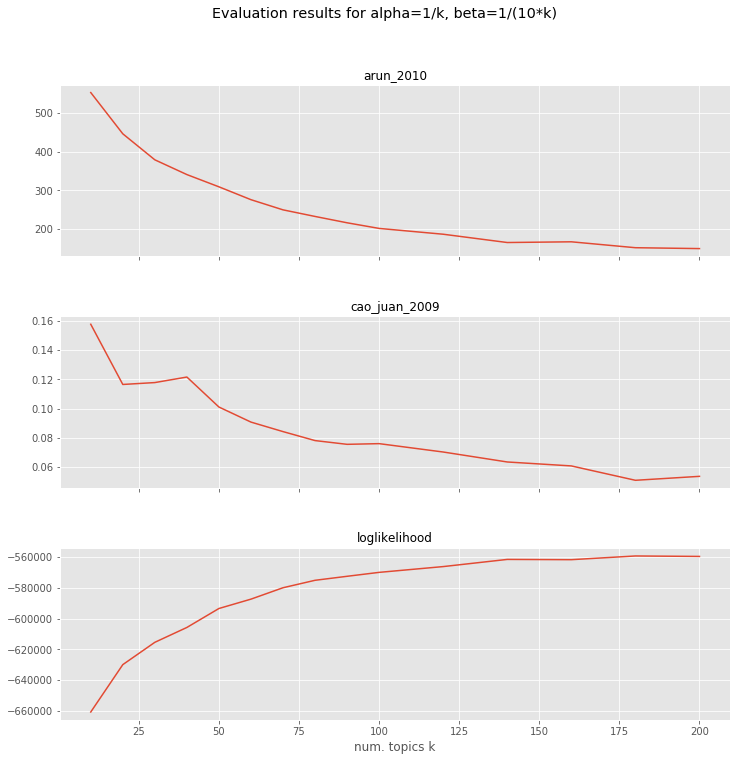

In [28]:
print('plotting evaluation results')
results_by_n_topics = results_by_parameter(eval_results5, 'n_topics')
plot_eval_results(results_by_n_topics, xaxislabel='num. topics k',
                  title='Evaluation results for alpha=1/k, beta=1/(10*k)', figsize=(12, 12))
#plt.savefig('data/lda_evaluation_plot.png')
plt.show()

## Runing LDA
### topics: 30 / alpha: 0.1 / beta: 1.0/(10*k)

In [37]:
#const_params = dict(n_iter=2000, alpha=0.1)
#varying_params = [dict(n_topics=k, eta=1.0/(10*k)) for k in ks]

# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel =  models.LdaMulticore(doc_term_matrix, num_topics=30, 
                                id2word = dictionary, passes=50, workers=16, 
                                alpha=0.1, eta=1.0/(10*30))

/usr/local/lib/python3.5/dist-packages/gensim/models/ldamodel.py:802: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


In [38]:
a =(ldamodel.print_topics(num_topics=60, num_words=5))
for x in a:
    print(x)

(0, '0.079*"study" + 0.070*"model" + 0.052*"worldwide" + 0.050*"taking" + 0.046*"teeth"')
(1, '0.092*"market" + 0.055*"global" + 0.045*"prices" + 0.039*"research" + 0.038*"forecast"')
(2, '0.066*"clinic" + 0.061*"india" + 0.060*"dentistry" + 0.059*"agravat" + 0.058*"ahmedabad"')
(3, '0.153*"training" + 0.098*"certificate" + 0.094*"bharat" + 0.094*"agravat" + 0.093*"receives"')
(4, '0.180*"world" + 0.149*"first" + 0.146*"robot" + 0.096*"chinese" + 0.094*"automated"')
(5, '0.116*"demand" + 0.107*"growth" + 0.102*"market" + 0.080*"players" + 0.076*"shares"')
(6, '0.058*"market" + 0.046*"prosthetics" + 0.039*"value" + 0.037*"full" + 0.034*"type"')
(7, '0.100*"industry" + 0.093*"research" + 0.091*"based" + 0.087*"market" + 0.087*"data"')
(8, '0.054*"market" + 0.046*"analysis" + 0.042*"research" + 0.039*"titanium" + 0.038*"markets"')
(9, '0.151*"market" + 0.108*"global" + 0.081*"analysis" + 0.078*"trends" + 0.071*"industry"')
(10, '0.112*"peer" + 0.080*"advanced" + 0.068*"leading" + 0.067*"t

In [41]:
len(tweets)

17227

In [40]:
#print(len(doc_term_matrix))
#print(len(tweets))

#print(doc_term_matrix[1])
#print(tweets[1])

for topico in range(0, 30):
    print("topico: %s" % topico)
    print(a[(topico)])
    print()
    tp = 0
    for i in range(0, len(tweets)):
    #for i in range(0, 1000):    
        topics = ldamodel.get_document_topics(doc_term_matrix[i])
        #rint("%s\n%s\n\n" % (tweets[i] ,topics))
        probTp = 0
        for t in topics:
            if t[1] > probTp:
                probTp = t[1]
                tpTweet = t[0]

        if tpTweet == topico:
            #print("%s\n%s\n\n" % (tweets[i] ,topics))
            print("%s\n\n" % (tweets[i]))
            tp = tp + 1
        if tp > 10:
            break
    print("\n\n-----------\n\n")


topico: 0
(0, '0.079*"study" + 0.070*"model" + 0.052*"worldwide" + 0.050*"taking" + 0.046*"teeth"')

A+Free shipping Dental Implant Disease Teeth Model with Restoration  https://t.co/wFVctT8AY8 https://t.co/sCGsm8lQRP


How Dental Implants Are Changing The Lives Of Denture Wearers https://t.co/p3C9Qz0GXP


Bid 1 Piece Dental Implant Demonstration Model Teeth Study Model 2019-II 100% https://t.co/v731kDgDMt https://t.co/DLjI5fw3G6


Dental Implant Demonstration Model Teeth Study Model 2019-I Clear Color https://t.co/NmCG4O9NQN https://t.co/4TPD5CJpfJ


Interviews with Dr. Luis G. Obando. Dental Implants in Costa Rica. https://t.co/SNyOyMlfS1 #DentalCostaRica https://t.co/OPKXTYOEfi


Dawood &amp; Tanner Introduction to Dental Implants: A one day implant course ideal both for dental nurses new to... https://t.co/uMKN3zLWsW


RT @DentalImplantCR: Interviews with Dr. Luis G. Obando. Dental Implants in Costa Rica. https://t.co/SNyOyMlfS1 #DentalCostaRica https://t.…


Bid 1 Piece Dental Imp

ClearChoice Dental Implant Center-Schaumburg reviews.
"Beware
Decided to go to clear choice to see what they... https://t.co/KCoLfDCQ0K


Growth of Nanotechnology Dental Implant Market is due to Lower Failure Rate of Dental… https://t.co/7u1Cv7BnQm


Growth of Nanotechnology Dental Implant Market is due to Lower Failure Rate of Dental… https://t.co/7mK52IVFDx




-----------


topico: 6
(6, '0.058*"market" + 0.046*"prosthetics" + 0.039*"value" + 0.037*"full" + 0.034*"type"')

Dental implant open evening - Thur 14th July 4-7pm Come and have an informal chat https://t.co/joeJW8Cjur


If you have lost a tooth, don't panic! Our team is experienced in dental implant placement.

https://t.co/14VOjWGxF9 https://t.co/Z2qpE6GNTJ


Share these FAQ's with patients when asked about the cost of dental implants. https://t.co/G7eGWbupVw #dental #dentistry


Get Some Guidance With Our August Story About Dental Implant Placement https://t.co/M9jsgoneEI #AugustImplants https://t.co/RoX7YRFBOP


Julie Ru

difference between natural tooth and dental implant https://t.co/KsAiWx4lL9


@HuffingtonPost Free dental implants is a very moving promise.


Here is the difference between a natural tooth and a dental implant https://t.co/gRB7d3bOEE


The differences between a dental implant and a natural tooth side by side. https://t.co/ZdROfVDQDB


The differences between a dental implant and a natural tooth side by side. https://t.co/sPFNqXrBYS


Global Dental Implants Market 2016- Danaher, DENTSPLY Implants https://t.co/q9QKqbYgUX #dentist


Make dental implant data capturing hassle free. Record everything securely on https://t.co/Rdf5PicmmL Register today https://t.co/AIptQW2hVR


A great illustration on the differences between a natural tooth and a dental implant.  Dental implants are the... https://t.co/ql27ua7z0d


Ask us about the difference between natural tooth and dental implant… https://t.co/JGYFPweibn


Ask us about the difference between natural tooth and dental implant… https://t.co/J

Dental implants market growth driven by thriving medical tourism &amp; demand for cosmetic #dentistry - https://t.co/6d7Dy130aw @zimmerbiomet


RT @researchmarkets: Dental implants market growth driven by thriving medical tourism &amp; demand for cosmetic #dentistry - https://t.co/6d7Dy…


The Secret to Marketing Dental Implants: Did you know that there is a good time of the year to market dental ... https://t.co/DniqOJQryD


Recent advances in ceramics for dentistry/ dental implant courses https://t.co/q9QKqbYgUX #dentist


Global Market For Dental Implant And Prosthetics Spurred By Developing Medical Tourism Industry In Emerging Nations …


World Dental Implants Market – Opportunities and Forecasts, 2014 – 2022 https://t.co/6iA1st0yzz


World Dental Implants Market – Opportunities and Forecasts, 2014 – 2022 https://t.co/UMIBHjZku3


Dr. O discusses dental implants on CBS channel 2 show -American Health Front. https://t.co/N83N4ds2RS


Dr Bharat Agravat Dental Implants Center received

@realDonaldTrump calls U.S. "the highest taxed country in the world." #DishonestDon is lying through his expensive dental implants. Loser.


Shatkin FIRST Two Day Mini Dental Implant Lecture Orlando 2016. https://t.co/90SmuQdMsw


South Korea represents one of the most mature dental implant markets in the world...  https://t.co/sbQz1ZA6YA


Today's guided surgery dental implant placement "hands-on" patients course @ Estepona https://t.co/0jXhoCTzRW


Registration is now open for Dental Implant Conference 2016! #DentalImplant2016 https://t.co/lMc8k6TOhD


Dental Implant Year Course 2017 now available. Book now and claim your early-bird discount!
https://t.co/wVxCgqijC6




-----------


topico: 25
(25, '0.125*"interview" + 0.125*"dentist" + 0.108*"diego" + 0.106*"cosmetic" + 0.069*"talks"')

4 Facts about Dental Implants Most Novi residents will lose a tooth at some point in their lives, but that... https://t.co/63wtHUm6oC


Poway Dental Implants|San Diego Dental Implant
-https://t.co/K

In [44]:
cmd = ("SELECT t.codtweet, t.text "
       "FROM tweet t "
       "INNER JOIN resultadoanaliseprojetotweet r ON r.codtweet = t.codtweet "
       "WHERE codresultadoanaliseprojeto = 12 AND codclassificacao = 223"
       )
tweets2 = query(cmd)
print(len(tweets2))

17227


In [45]:
tweets2[:10]

[(77432412,
  "Don't forget to register for the next Dental Implant Seminar. July 13 in East Aurora; July 14 in Amherst.... https://t.co/4N4qeo9ygw"),
 (77490497,
  'Register Now!\n\nDental Implant Training (2 modules) With patients 1st Module (2-3 days) 13-15 October 2016\n\nModule... https://t.co/TbHaJSrXIl'),
 (77493277,
  'Register Now!\n\nDental Implant Training (2 modules) With patients 1st Module (2-3 days) 13-15 October 2016\n\nModule... https://t.co/gkH0Q2Uc2V'),
 (77494286,
  'Dental Consumables Market :  Take Advantage of Growing Dental Implant Demand https://t.co/eWR4ajMigv #infowars #alexjones'),
 (77496127,
  'Free Senior Lecture Dental Treatment For A Lifetime Using Dental Implants: Wed, Jul 13 2016 11:30 AM… https://t.co/APBnaj5EIc #GlendaleCA'),
 (77499407,
  'Thinking about Dental Implants? Join us tonight for a FREE Seminar &amp; get all of your questions answered! https://t.co/Y0YDwSesuV'),
 (77499495,
  '[DENTAL PROFESSIONALS] CE: Jul 28 Online Marketing Strategies

In [42]:
tweets[:10]

[("Don't forget to register for the next Dental Implant Seminar. July 13 in East Aurora; July 14 in Amherst.... https://t.co/4N4qeo9ygw",),
 ('Register Now!\n\nDental Implant Training (2 modules) With patients 1st Module (2-3 days) 13-15 October 2016\n\nModule... https://t.co/TbHaJSrXIl',),
 ('Register Now!\n\nDental Implant Training (2 modules) With patients 1st Module (2-3 days) 13-15 October 2016\n\nModule... https://t.co/gkH0Q2Uc2V',),
 ('Dental Consumables Market :  Take Advantage of Growing Dental Implant Demand https://t.co/eWR4ajMigv #infowars #alexjones',),
 ('Free Senior Lecture Dental Treatment For A Lifetime Using Dental Implants: Wed, Jul 13 2016 11:30 AM… https://t.co/APBnaj5EIc #GlendaleCA',),
 ('Thinking about Dental Implants? Join us tonight for a FREE Seminar &amp; get all of your questions answered! https://t.co/Y0YDwSesuV',),
 ('[DENTAL PROFESSIONALS] CE: Jul 28 Online Marketing Strategies, Aug 11 Interdisciplinary Approach to Dental Implants  https://t.co/qrgPwxrrQ

In [62]:
twTopics = []
for i in range(0, len(tweets2)):
    topics = ldamodel.get_document_topics(doc_term_matrix[i])
    #print("%s\n%s\n\n" % (tweets2[i] ,topics))
    probTp = 0
    for t in topics:
        if t[1] > probTp:
            probTp = t[1]
            tpTweet = t[0]
    #print(tpTweet)
    twTopics.append(tpTweet + 1)

    cmd = ("INSERT INTO resultadoanaliseprojetotweet "
           "(codresultadoanaliseprojeto, codclassificacao, codtweet) VALUES " 
           "(13, 1" + str(tpTweet + 1).zfill(3) + " , " + str(tweets2[i][0]) + ")");
    #execSQL(cmd)
    
Counter(twTopics).most_common()

In [63]:
Counter(twTopics).most_common()

[(29, 1462),
 (5, 1136),
 (10, 1101),
 (26, 979),
 (17, 808),
 (3, 698),
 (24, 677),
 (27, 622),
 (12, 621),
 (2, 593),
 (20, 576),
 (23, 576),
 (9, 557),
 (18, 509),
 (1, 501),
 (28, 498),
 (25, 495),
 (16, 427),
 (19, 424),
 (14, 422),
 (15, 395),
 (7, 387),
 (4, 377),
 (11, 374),
 (6, 372),
 (22, 365),
 (8, 337),
 (30, 319),
 (13, 310),
 (21, 309)]

In [61]:
Counter(twTopics).most_common()

[(29, 1459),
 (5, 1137),
 (10, 1096),
 (26, 978),
 (17, 807),
 (3, 697),
 (24, 674),
 (12, 624),
 (27, 623),
 (2, 595),
 (20, 578),
 (23, 574),
 (9, 555),
 (18, 511),
 (1, 500),
 (28, 500),
 (25, 496),
 (16, 428),
 (19, 425),
 (14, 422),
 (15, 396),
 (7, 388),
 (4, 378),
 (6, 373),
 (11, 372),
 (22, 366),
 (8, 338),
 (30, 320),
 (13, 311),
 (21, 306)]